# AIM 511 : Machine Learning Project - Checkpoint 1.

In [176]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import FitFailedWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [92]:
# Reading the training data
train_df = pd.read_csv("train.csv")

In [93]:
# Reading the testing data
test_df = pd.read_csv("test.csv")

In [94]:
test_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,DQRTA8KWGC,51,99473,170353,628,24,1,17.03,12,0.46,PhD,Self-employed,Divorced,Yes,Yes,Auto,Yes
51066,W0FDMPACG3,29,42016,111314,371,51,4,7.10,36,0.50,PhD,Self-employed,Married,No,No,Other,No
51067,MA0F4U8ORY,67,88507,142666,731,51,1,22.89,48,0.79,Bachelor's,Part-time,Divorced,No,No,Education,No
51068,6QUH04P7EJ,42,116649,190938,488,6,1,10.83,60,0.32,Bachelor's,Full-time,Married,No,Yes,Other,Yes


In [95]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  object 
 11  EmploymentType  204277 non-null  object 
 12  MaritalStatus   204277 non-null  object 
 13  HasMortgage     204277 non-null  object 
 14  HasDependents   204277 non-null  object 
 15  LoanPurpose     204277 non-null  object 
 16  HasCoSigner     204277 non-null  object 
 17  Default   

# About the Dataset

# Introduction

### Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

# Description

### The dataset contains 255,347 rows and 18 columns in total.

# Features of the Dataset

### LoanID [string] : A unique identifier for each loan.
### Age [integer] : The age of the borrower.
### Income [integer] : The annual income of the borrower.
### LoanAmount [integer] : The amount of money being borrowed.
### CreditScore [integer] : The credit score of the borrower, indicating their creditworthiness.
### MonthsEmployed [integer] : The number of months the borrower has been employed.
### NumCreditLines [integer] : The number of credit lines the borrower has open.
### InterestRate [float] : The interest rate for the loan.
### LoanTerm [integer] : The term length of the loan in months.
### DTIRatio [float] : The Debt-to-Income ratio, indicating the borrower’s debt compared to their income.
### Education [string] : The highest level of education attained by the borrower (PhD, Master’s, Bachelor’s, High School).
### EmploymentType [string] : The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).
### MaritalStatus [string] : The marital status of the borrower (Single, Married, Divorced).
### HasMortgage [string] : Whether the borrower has a mortgage (Yes or No).
### HasDependents [string] : Whether the borrower has dependents (Yes or No).
### LoanPurpose [string] : The purpose of the loan (Home, Auto, Education, Business, Other).
### HasCoSigner [string] : Whether the loan has a co-signer (Yes or No).
### Default [integer] : The binary target variable indicating whether the loan defaulted (1) or not (0).


# Data Cleaning

## Issues with the dataset

### Quality Issues
#### There are no completeness, validity, accuracy and consistency issues in the dataset.
### Tidiness Issues
#### There are no tidiness issues.

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  object 
 11  EmploymentType  204277 non-null  object 
 12  MaritalStatus   204277 non-null  object 
 13  HasMortgage     204277 non-null  object 
 14  HasDependents   204277 non-null  object 
 15  LoanPurpose     204277 non-null  object 
 16  HasCoSigner     204277 non-null  object 
 17  Default   

In [98]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000
mean,43.489340,82506.227980,127547.496395,574.075500,59.508511,2.502078,13.488147,36.010926,0.500579,0.116278
std,14.995191,38952.103374,70855.064746,158.877098,34.645589,1.116898,6.636060,16.944827,0.230914,0.320559
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48878.000000,66059.000000,437.000000,30.000000,2.000000,7.760000,24.000000,0.300000,0.000000
50%,43.000000,82400.000000,127603.000000,574.000000,59.000000,3.000000,13.450000,36.000000,0.500000,0.000000
75%,56.000000,116247.000000,188843.000000,712.000000,90.000000,4.000000,19.240000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Tidiness Issues

In [99]:
train_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [100]:
train_df.duplicated().sum()

np.int64(0)

In [101]:
def describe(df : pd.DataFrame ,column : str) :
    """
    This function displays the statistics of the given dataframe using the describe method

    args:
        df     : Pandas DataFrame for whose column the statistics has to be displayed.
        column : The column of the dataframe.
        
    return :
        None
    """
    display(train_df[column].describe())

In [102]:
describe(train_df, 'Age')

count    204277.000000
mean         43.489340
std          14.995191
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

In [103]:
describe(train_df, 'Income')

count    204277.000000
mean      82506.227980
std       38952.103374
min       15000.000000
25%       48878.000000
50%       82400.000000
75%      116247.000000
max      149999.000000
Name: Income, dtype: float64

In [104]:
describe(train_df,'LoanAmount')

count    204277.000000
mean     127547.496395
std       70855.064746
min        5001.000000
25%       66059.000000
50%      127603.000000
75%      188843.000000
max      249999.000000
Name: LoanAmount, dtype: float64

In [105]:
describe(train_df,'CreditScore')

count    204277.000000
mean        574.075500
std         158.877098
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

In [106]:
describe(train_df,'MonthsEmployed')

count    204277.000000
mean         59.508511
std          34.645589
min           0.000000
25%          30.000000
50%          59.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

In [107]:
describe(train_df,'NumCreditLines')

count    204277.000000
mean          2.502078
std           1.116898
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: NumCreditLines, dtype: float64

In [108]:
describe(train_df,'InterestRate')

count    204277.000000
mean         13.488147
std           6.636060
min           2.000000
25%           7.760000
50%          13.450000
75%          19.240000
max          25.000000
Name: InterestRate, dtype: float64

In [109]:
describe(train_df,'LoanTerm')

count    204277.000000
mean         36.010926
std          16.944827
min          12.000000
25%          24.000000
50%          36.000000
75%          48.000000
max          60.000000
Name: LoanTerm, dtype: float64

In [110]:
describe(train_df,'DTIRatio')

count    204277.000000
mean          0.500579
std           0.230914
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

In [111]:
train_df['Education'].value_counts()

Education
Bachelor's     51483
High School    51046
PhD            50980
Master's       50768
Name: count, dtype: int64

In [112]:
train_df['EmploymentType'].value_counts()

EmploymentType
Part-time        51460
Unemployed       50994
Full-time        50921
Self-employed    50902
Name: count, dtype: int64

In [113]:
train_df['MaritalStatus'].value_counts()

MaritalStatus
Married     68217
Divorced    68137
Single      67923
Name: count, dtype: int64

In [114]:
train_df['HasMortgage'].value_counts()

HasMortgage
Yes    102145
No     102132
Name: count, dtype: int64

In [115]:
train_df['HasDependents'].value_counts()

HasDependents
Yes    102180
No     102097
Name: count, dtype: int64

In [116]:
train_df['LoanPurpose'].value_counts()

LoanPurpose
Business     40984
Home         40878
Education    40855
Other        40829
Auto         40731
Name: count, dtype: int64

In [117]:
train_df['HasCoSigner'].value_counts()

HasCoSigner
Yes    102196
No     102081
Name: count, dtype: int64

In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  object 
 11  EmploymentType  204277 non-null  object 
 12  MaritalStatus   204277 non-null  object 
 13  HasMortgage     204277 non-null  object 
 14  HasDependents   204277 non-null  object 
 15  LoanPurpose     204277 non-null  object 
 16  HasCoSigner     204277 non-null  object 
 17  Default   

In [119]:
def preProcess(df : pd.DataFrame) -> pd.DataFrame:
    """
    This function takes in a dataframe and applies a few preprocessing steps.

    args :
        df : This is the dataframe on which the preprocessing is to be applied.

    returns :
        df : Returns the dataframe after applying the preprocessing steps.
    """
    try:
        df = df.drop(columns='LoanID')
        df['HasDependents'] = df['HasDependents'].map({'Yes': 1, 'No': 0}).astype(bool)
        df['HasCoSigner'] = df['HasCoSigner'].map({'Yes': 1, 'No': 0}).astype(bool)
        df['HasMortgage'] = df['HasMortgage'].map({'Yes': 1, 'No': 0}).astype(bool)
        
        return df
    except Exception as e:
        print(e)

In [120]:
train_df = preProcess(train_df)

In [121]:
test_df = preProcess(test_df)

In [122]:
train_df['HasDependents']

0         False
1          True
2         False
3         False
4          True
          ...  
204272    False
204273    False
204274    False
204275    False
204276    False
Name: HasDependents, Length: 204277, dtype: bool

In [123]:
test_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,True,True,Home,False
1,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,True,True,Education,True
2,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,True,True,Education,True
3,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,False,False,Business,True
4,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,False,True,Business,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,51,99473,170353,628,24,1,17.03,12,0.46,PhD,Self-employed,Divorced,True,True,Auto,True
51066,29,42016,111314,371,51,4,7.10,36,0.50,PhD,Self-employed,Married,False,False,Other,False
51067,67,88507,142666,731,51,1,22.89,48,0.79,Bachelor's,Part-time,Divorced,False,False,Education,False
51068,42,116649,190938,488,6,1,10.83,60,0.32,Bachelor's,Full-time,Married,False,True,Other,True


In [124]:
train_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,True,False,Business,False,0
1,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,False,True,Education,False,0
2,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,False,False,Other,True,0
3,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,True,False,Auto,True,1
4,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,False,True,Education,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,False,False,Home,True,0
204273,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,False,False,Business,True,0
204274,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,True,False,Auto,False,0
204275,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,True,False,Home,False,0


# Exploratory Data Analysis

## Univariate Analysis

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_univariate_numerical(df: pd.DataFrame, column: str) -> None:
    """
    Plot histogram, box plot, and KDE plot for a numerical column, and print important statistical measures.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column (str): The column to analyze.
    """
    # Calculate statistical measures
    mean = df[column].mean()
    median = df[column].median()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    quartiles = df[column].quantile([0.25, 0.5, 0.75])

    # Print statistical measures
    print(f"Statistical Summary for '{column}':")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Minimum: {min_val}")
    print(f"Maximum: {max_val}")
    print(f"25th Percentile (Q1): {quartiles[0.25]}")
    print(f"50th Percentile (Median, Q2): {quartiles[0.5]}")
    print(f"75th Percentile (Q3): {quartiles[0.75]}")
    print("\n")

    # Create plots
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=False, bins=30, color="skyblue")
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[column], color="lightcoral")
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column)

    # KDE Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[column], fill=True, color="limegreen")
    plt.title(f'KDE Plot of {column}', fontsize=14)
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

Statistical Summary for 'Age':
Mean: 43.49
Median: 43.00
Standard Deviation: 15.00
Minimum: 18
Maximum: 69
25th Percentile (Q1): 31.0
50th Percentile (Median, Q2): 43.0
75th Percentile (Q3): 56.0




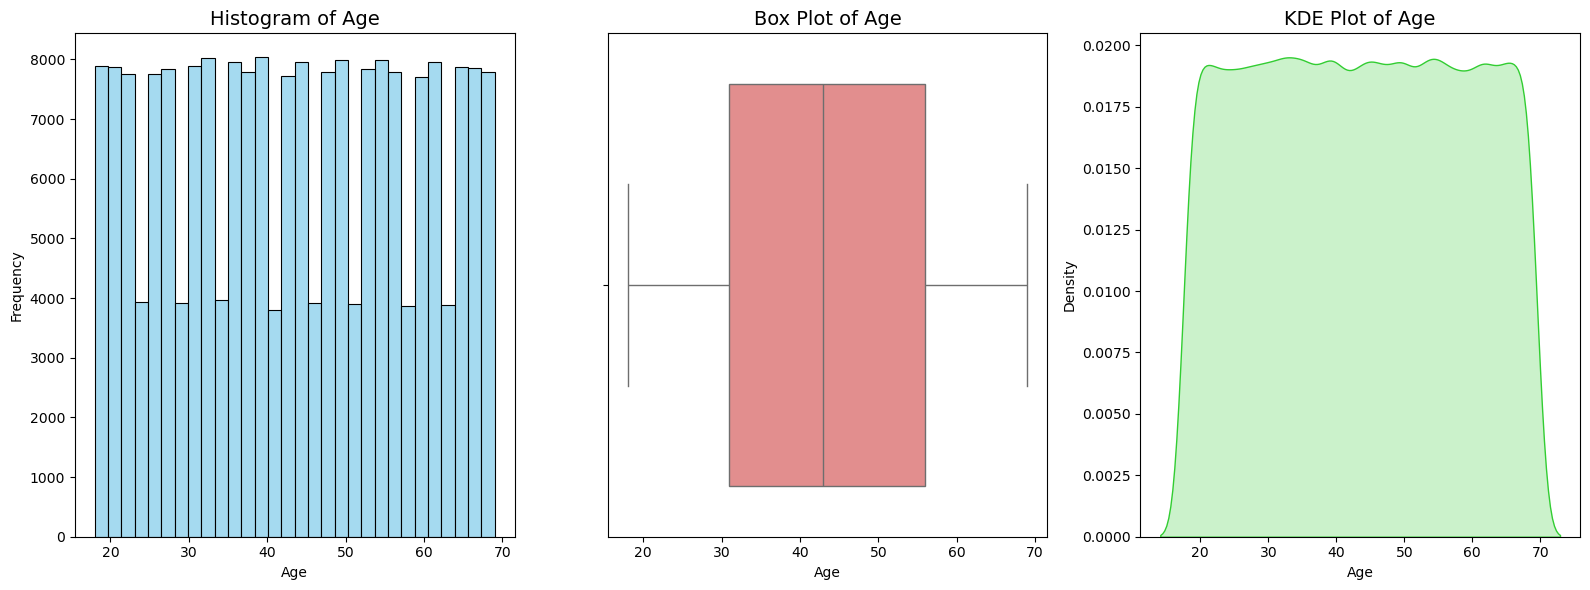

In [126]:
plot_univariate_numerical(train_df, 'Age')

**Conclusions**
- The histogram shows a uniform distribution of ages in the dataset, meaning that each age range is represented roughly equally.
- The box plot indicates that the age values are mostly concentrated between approximately 25 and 65 years, with no significant outliers in the distribution.
- The KDE plot also confirms the uniform distribution, with the density being nearly constant across the age range.

In [ ]:
plot_univariate_numerical(train_df, 'Income')

: 

**Conclusions**

- The mean income is approximately 82,506, and the median is 82,400, indicating a very symmetric distribution since the mean and median are almost equal.
- The histogram shows a relatively uniform distribution across income levels.
- The box plot confirms the absence of outliers, with incomes distributed fairly evenly between the minimum and maximum values. The interquartile range (IQR) also indicates that the middle 50% of incomes are spread relatively widely.
- The KDE plot mirrors the histogram, displaying a nearly flat density curve, which again confirms a uniform distribution. 

Statistical Summary for 'LoanAmount':
Mean: 127547.50
Median: 127603.00
Standard Deviation: 70855.06
Minimum: 5001
Maximum: 249999
25th Percentile (Q1): 66059.0
50th Percentile (Median, Q2): 127603.0
75th Percentile (Q3): 188843.0




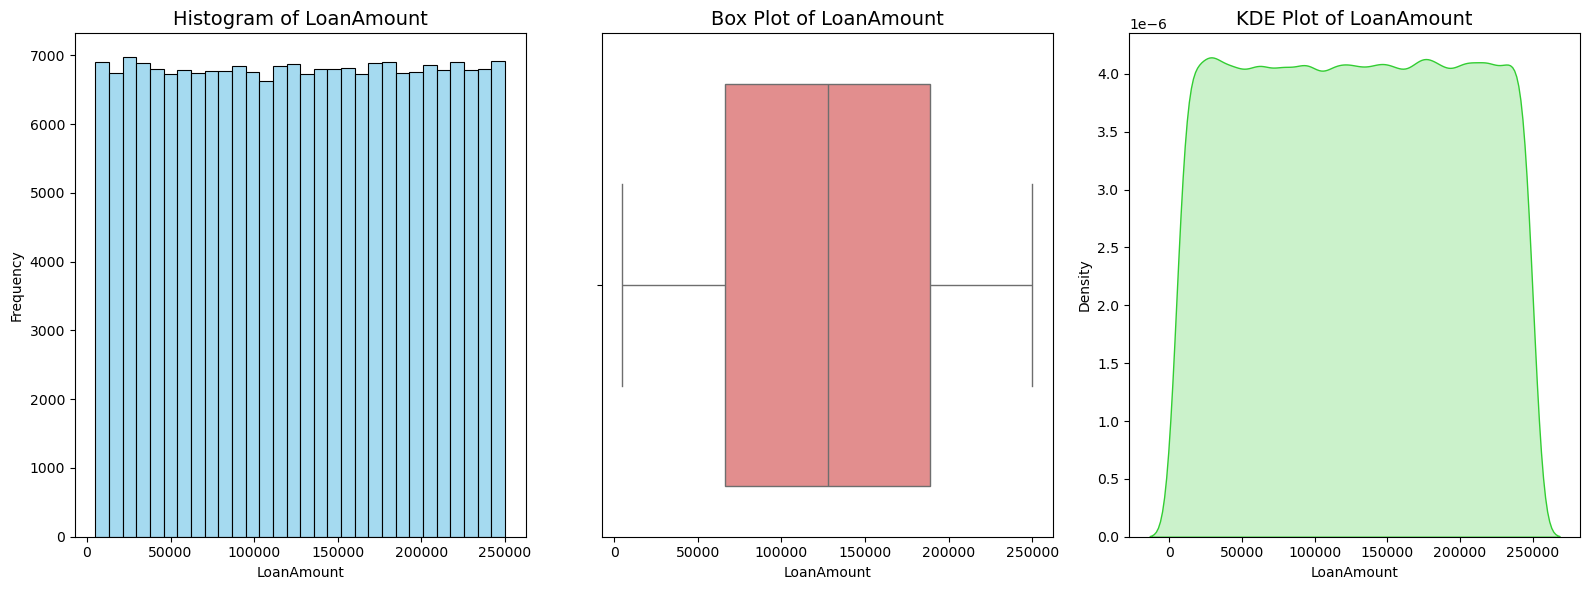

In [127]:
plot_univariate_numerical(train_df, 'LoanAmount')

**Conclusions**
- The LoanAmount variable has a uniform distribution, as shown by the evenly spaced bars in the histogram and the flat density in the KDE plot.
- The box plot confirms a balanced distribution with no significant outliers, indicating that loan amounts are spread consistently across the dataset.

In [ ]:
plot_univariate_numerical(train_df, 'CreditScore')

: 

**Conclusions**
- The CreditScore variable has a uniform distribution, as shown by the evenly spaced bars in the histogram and flat density in the KDE plot.
- The box plot reveals a balanced spread without outliers, indicating consistent credit score ranges across the dataset.


Statistical Summary for 'MonthsEmployed':
Mean: 59.51
Median: 59.00
Standard Deviation: 34.65
Minimum: 0
Maximum: 119
25th Percentile (Q1): 30.0
50th Percentile (Median, Q2): 59.0
75th Percentile (Q3): 90.0




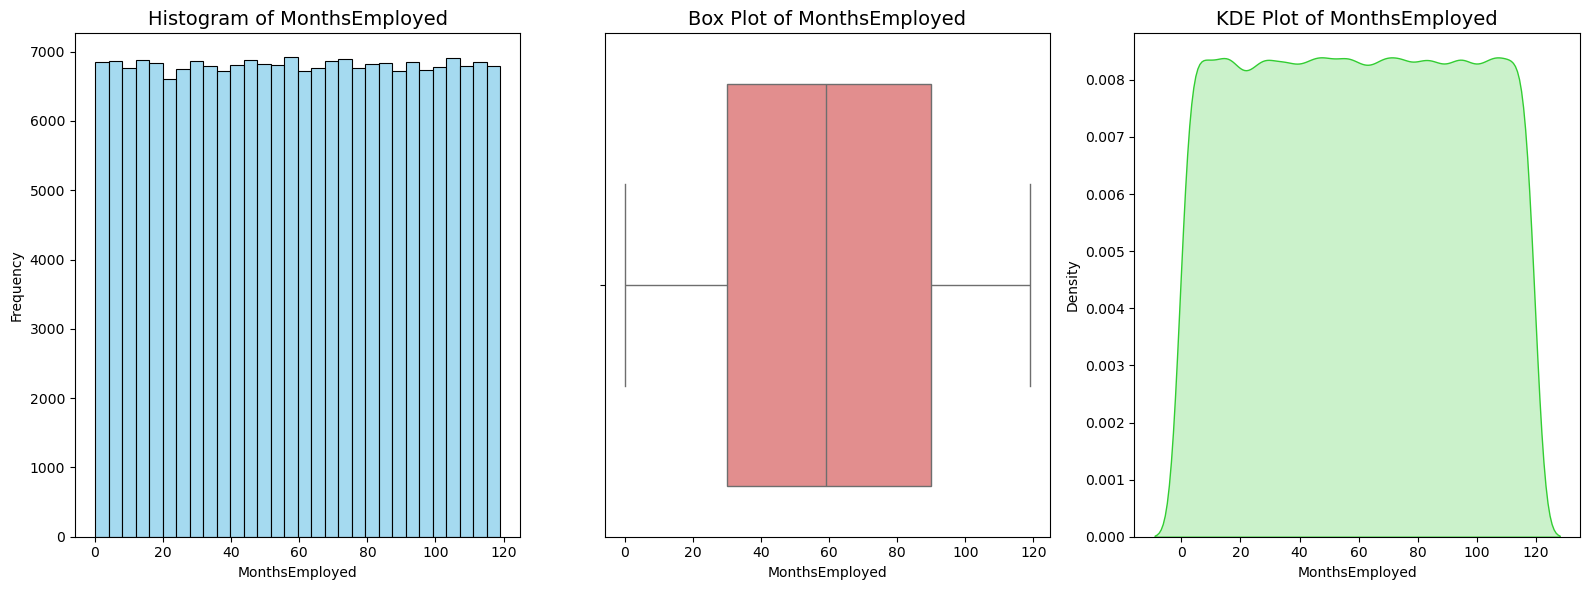

In [128]:
plot_univariate_numerical(train_df, 'MonthsEmployed')

**Conclusions**
- The MonthsEmployed variable displays a uniform distribution, as seen in the evenly spaced histogram and flat density in the KDE plot.
- The box plot shows a balanced spread without any notable outliers, indicating a consistent distribution of employment duration across the dataset.


Statistical Summary for 'NumCreditLines':
Mean: 2.50
Median: 3.00
Standard Deviation: 1.12
Minimum: 1
Maximum: 4
25th Percentile (Q1): 2.0
50th Percentile (Median, Q2): 3.0
75th Percentile (Q3): 4.0




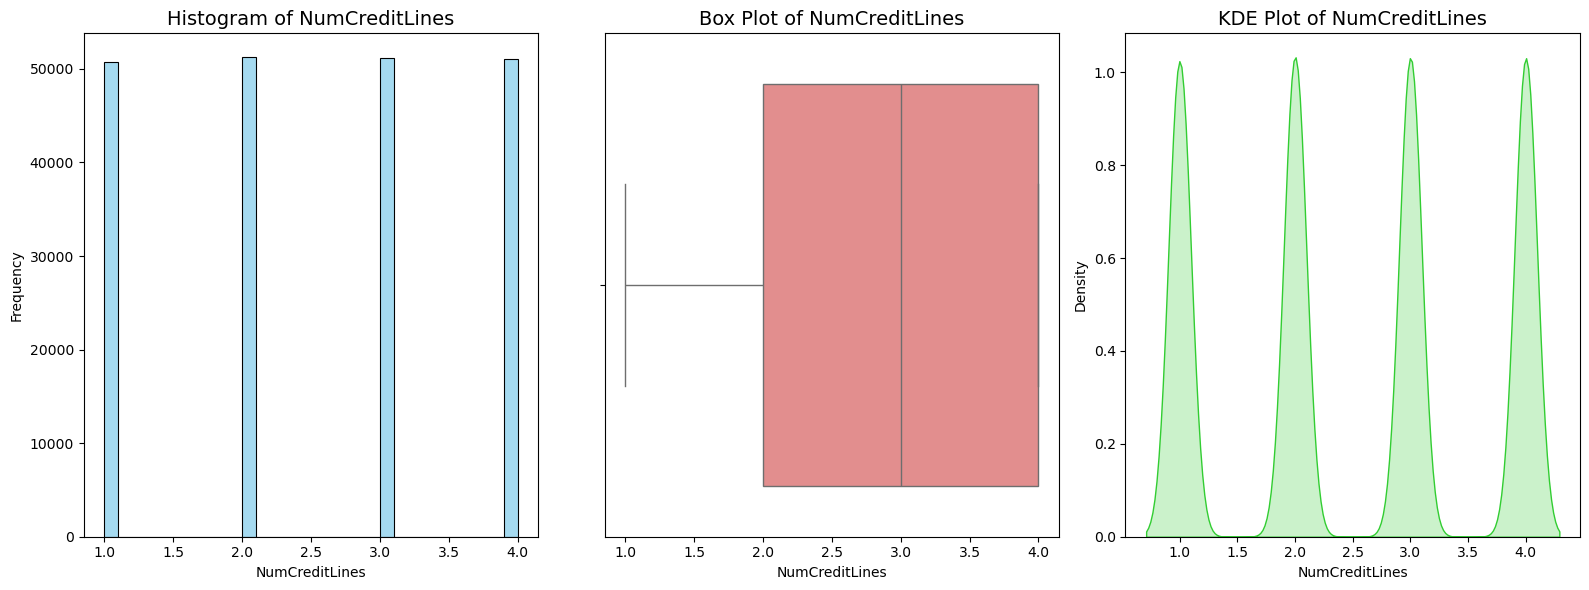

In [129]:
plot_univariate_numerical(train_df, 'NumCreditLines')

**Conclusions**
- The mean is 2.50, and the median is 3.00, indicating a slightly left-skewed distribution where most values are centered around 3.
- The histogram shows that the data is evenly distributed across the four possible values (1, 2, 3, and 4), with each having nearly the same frequency.
- The KDE plot displays four distinct peaks corresponding to the four possible values, with high density at each. This is expected since NumCreditLines appears to take on only integer values (discrete data).

In [ ]:
plot_univariate_numerical(train_df, 'InterestRate')

: 

**Conclusions**
- The Interest variable displays a uniform distribution, as seen in the evenly spaced histogram and flat density in the KDE plot.
- The box plot shows a balanced spread without any notable outliers, indicating a consistent distribution of employment duration across the dataset.

Statistical Summary for 'LoanTerm':
Mean: 36.01
Median: 36.00
Standard Deviation: 16.94
Minimum: 12
Maximum: 60
25th Percentile (Q1): 24.0
50th Percentile (Median, Q2): 36.0
75th Percentile (Q3): 48.0




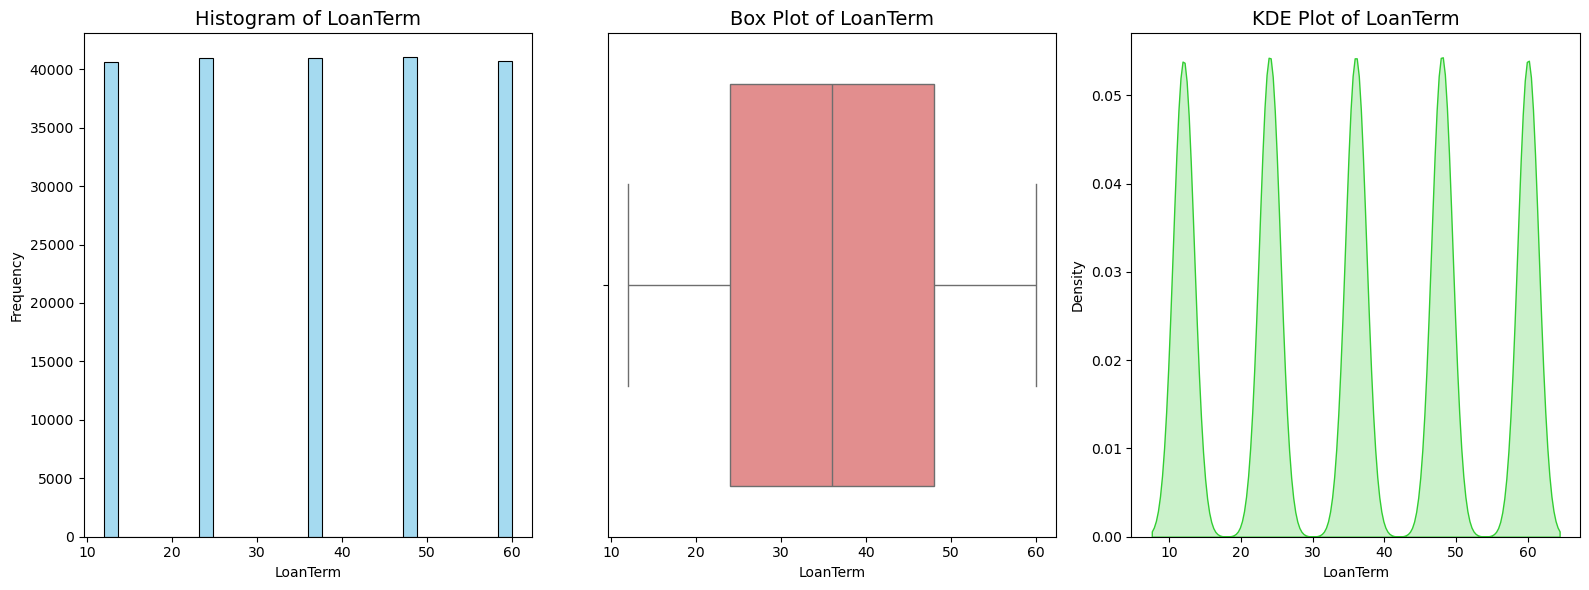

In [130]:
plot_univariate_numerical(train_df, 'LoanTerm')

**Conclusions**
- The LoanTerm variable appears to have discrete, evenly distributed values, as shown by the histogram with distinct bars and the peaks in the KDE plot.
- The box plot indicates a balanced range of loan terms with no outliers, suggesting consistent representation across different term lengths.

In [ ]:
plot_univariate_numerical(train_df, 'DTIRatio')

: 

**Conclusions**
- The DTIRation variable displays a uniform distribution, as seen in the evenly spaced histogram and flat density in the KDE plot.
- The box plot shows a balanced spread without any notable outliers, indicating a consistent distribution of employment duration across the dataset.

def plot_univariate_categorical(df : pd.DataFrame , column : str) -> None:
    """
    Plot bar plot for a categorical column.
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f'Bar Plot of {column}', fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

In [131]:
def plot_univariate_categorical(df, column):
    """
    Plot bar plot for a categorical column.
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f'Bar Plot of {column}', fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/4117736718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)


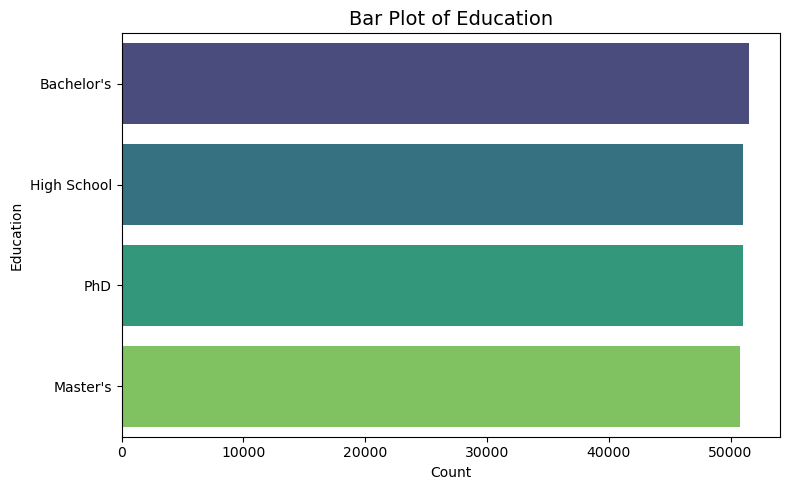

In [132]:
plot_univariate_categorical(train_df, 'Education')

: 

**Conclusions**
- The Education levels are evenly represented, with each category having a similar count.
- This balanced distribution indicates that the dataset likely includes equal representation across education levels.
- Such uniformity helps prevent bias related to education level in model predictions.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/4117736718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)


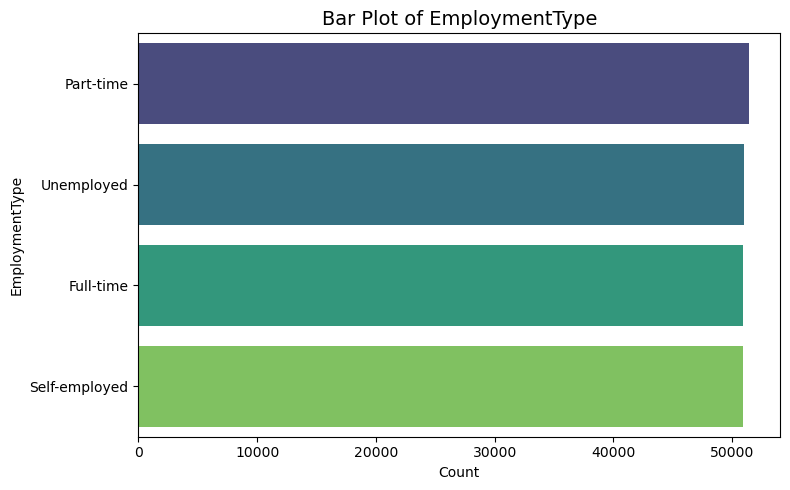

In [133]:
plot_univariate_categorical(train_df, 'EmploymentType')

**Conclusions**
- The employment types are evenly represented, with each category having a similar count.
- This balanced distribution indicates that the dataset likely includes equal representation across employment types.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/4117736718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)


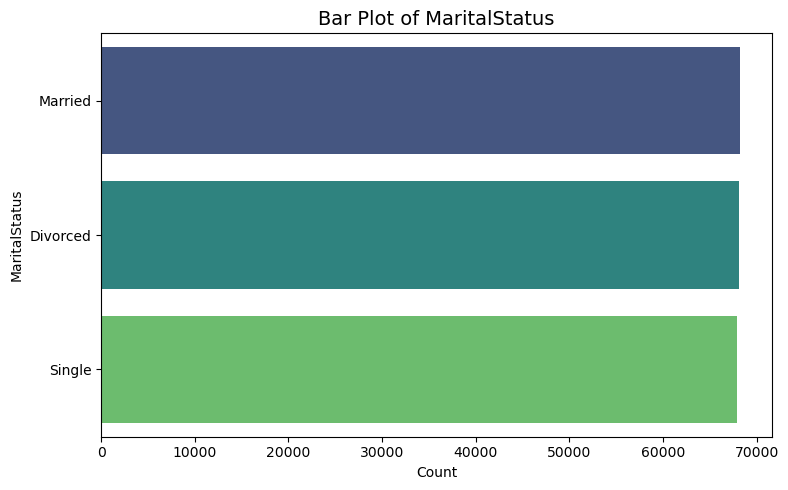

In [134]:
plot_univariate_categorical(train_df, 'MaritalStatus')

**Conclusions**
- The marital statuses are evenly represented, with each category having a similar count.
- This balanced distribution indicates that the dataset likely includes equal representation across martial statuses.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/4117736718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)


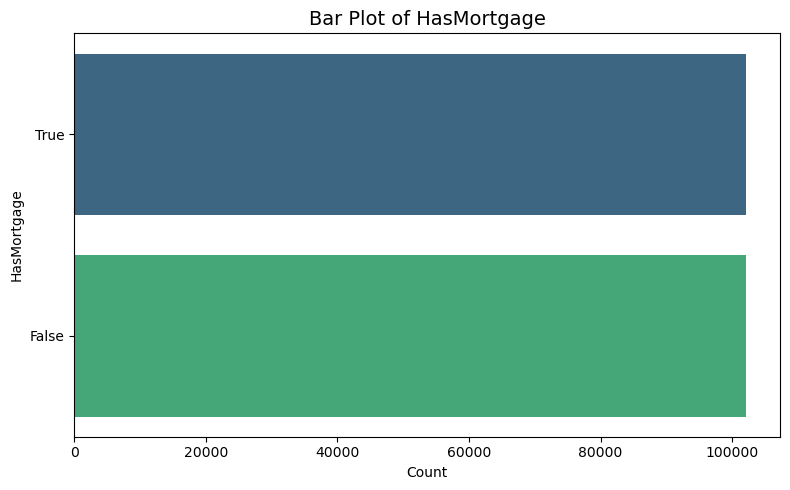

In [135]:
plot_univariate_categorical(train_df, 'HasMortgage')

**Conclusions**
- The count of people having mortgages are evenly represented, with each category having a similar count.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/4117736718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)


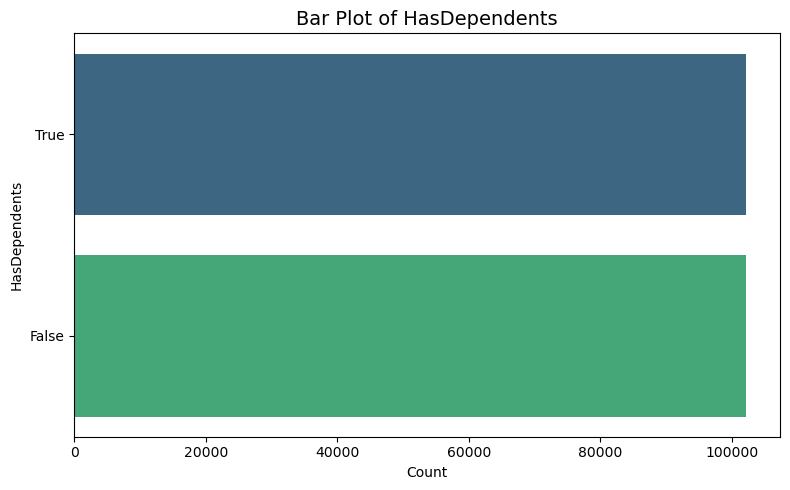

In [136]:
plot_univariate_categorical(train_df, 'HasDependents')

**Conclusions**
- The count of people having dependents are evenly represented, with each category having a similar count.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/4117736718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)


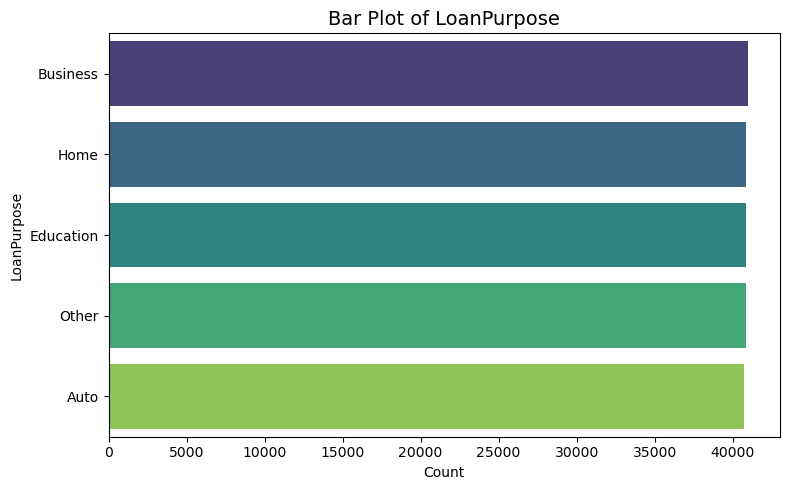

In [137]:
plot_univariate_categorical(train_df, 'LoanPurpose')

**Conclusions**
- The count of purposes for which loans are taken are evenly represented, with each category having a similar count.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/4117736718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, palette="viridis", order=df[column].value_counts().index)


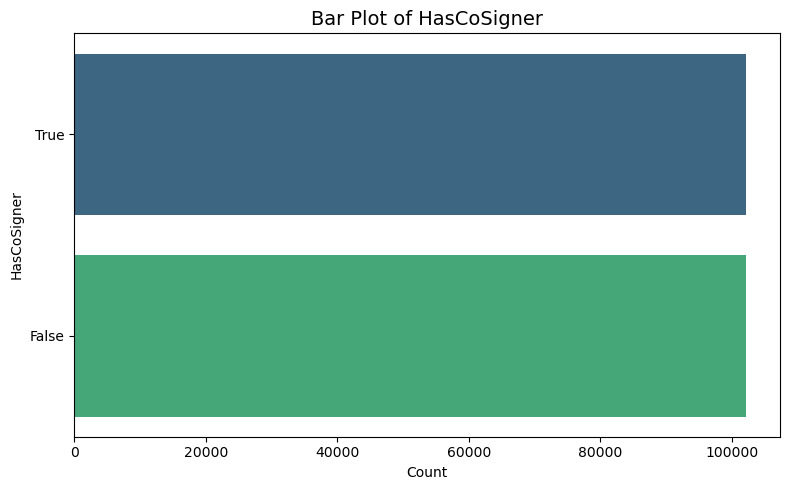

In [138]:
plot_univariate_categorical(train_df, 'HasCoSigner')

: 

**Conclusions**
- The count of people having co-signer are evenly represented, with each category having a similar count.

## Bivariate Analysis

# Numerical Vs. Categorical. 

In [139]:
def plot_bivariate_box(df, numerical_col, categorical_col):
    """
    Box plot for a numerical column grouped by a categorical column.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette="Set2")
    plt.title(f'Box Plot of {numerical_col} by {categorical_col}', fontsize=14)
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/3653580926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette="Set2")


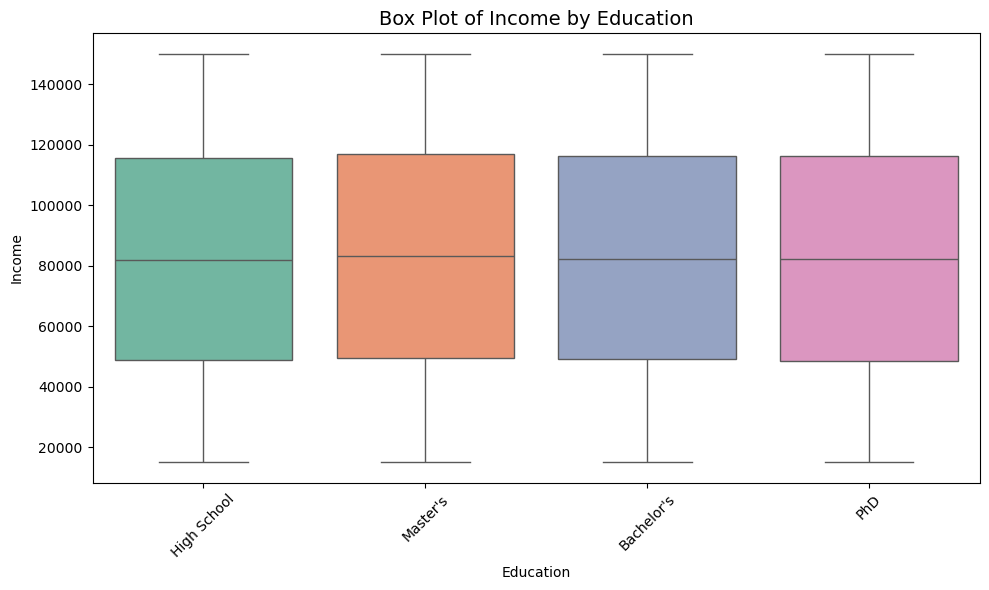

In [140]:
plot_bivariate_box(train_df, numerical_col='Income', categorical_col='Education')

**Conclusions**
-  Median income is relatively similar across all education levels, indicating little difference in central income values.
-  The interquartile ranges (IQR) and overall spread are also comparable, suggesting consistent income distribution across educational categories.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/3653580926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette="Set2")


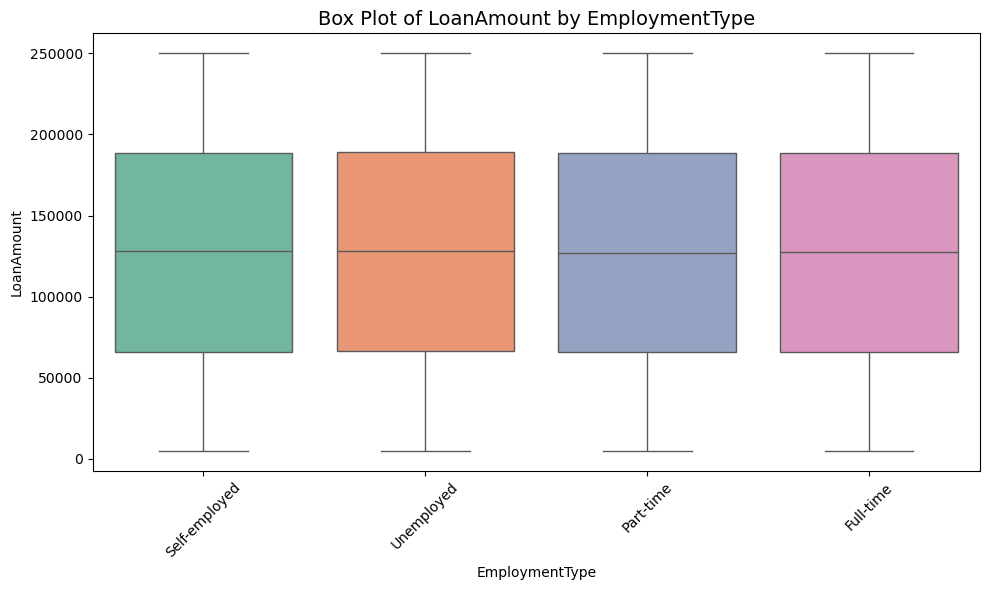

In [141]:
plot_bivariate_box(train_df, numerical_col='LoanAmount', categorical_col='EmploymentType')

**Conclusions**
- Median LoanAmount is similar across all EmploymentType categories, indicating no major differences in central loan values.
- The interquartile ranges and overall spread are comparable, suggesting a consistent loan amount distribution regardless of employment status.

In [ ]:
plot_bivariate_box(train_df, numerical_col='Income', categorical_col='EmploymentType')

: 

**Conclusions**
- Median Income is similar across all EmploymentType categories, indicating no major differences in central loan values.
- The interquartile ranges and overall spread are comparable, suggesting a consistent income distribution regardless of employment status.

/var/folders/2j/9nzngybs4zn5hwp3lmvdhg2h0000gn/T/ipykernel_72467/3653580926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette="Set2")


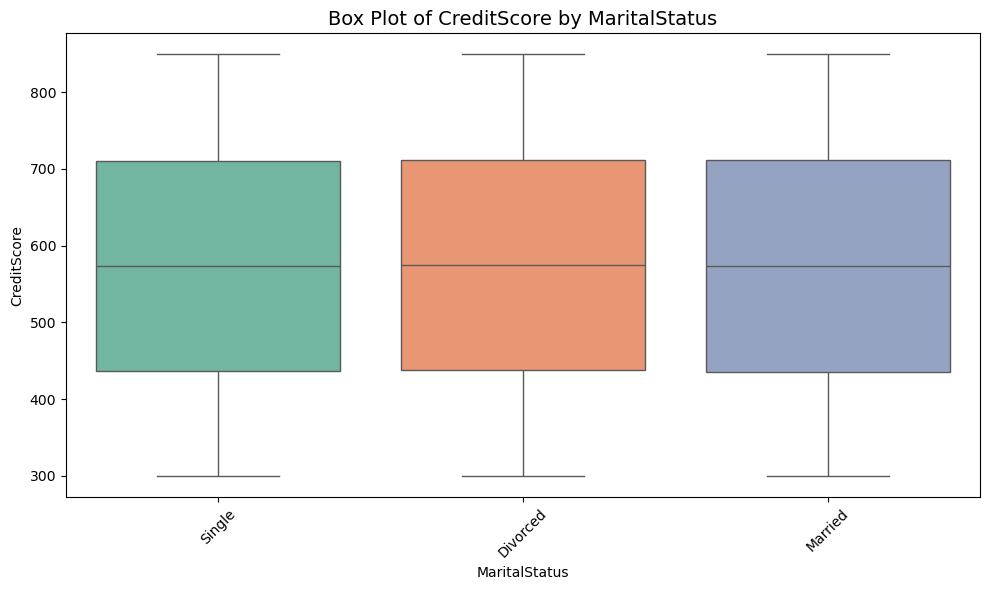

In [142]:
plot_bivariate_box(train_df,numerical_col='CreditScore', categorical_col='MaritalStatus')

**Conclusions**
- Median CreditScore is similar across all MaritalStatus categories, indicating no major differences in central loan values.
- The interquartile ranges and overall spread are comparable, suggesting a consistent CreditScore distribution regardless of marital status.

# Mulitvariate Analysis

In [143]:
def plot_correlation_heatmap(df):
    """
    Heatmap of correlations for numerical columns.
    """
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
    plt.title("Correlation Heatmap", fontsize=14)
    plt.tight_layout()
    plt.show()

# Encoding columns

In [144]:
train_df['Education'].astype('str').str.strip()

0         High School
1         High School
2            Master's
3          Bachelor's
4          Bachelor's
             ...     
204272     Bachelor's
204273     Bachelor's
204274            PhD
204275    High School
204276     Bachelor's
Name: Education, Length: 204277, dtype: object

In [145]:
test_df['Education'].astype('str').str.strip()

0                PhD
1        High School
2           Master's
3        High School
4                PhD
            ...     
51065            PhD
51066            PhD
51067     Bachelor's
51068     Bachelor's
51069       Master's
Name: Education, Length: 51070, dtype: object

In [146]:
from sklearn.preprocessing import OrdinalEncoder
def ordinalEncodeEducation(df : pd.DataFrame) -> pd.DataFrame:
    """
    This function ordinally encodes the 'Education' column of the dataset.

    The order followed is the ['High School', "Bachelor's", "Master's", 'PhD']
    args :
        df : Dataframe taken as the input

    returns :
        A dataframe with 'Education' column ordinally encoded.
    
    """
    try:
        
        education_order = ['High School', "Bachelor's", "Master's", 'PhD']
        ordinal_encoder = OrdinalEncoder(categories=[education_order])
        
        
        df['Education'] = ordinal_encoder.fit_transform(df[['Education']])
        df['Education'] = df['Education'].astype(int)
        
        return df
        
    except Exception as e:
        print(e)

In [147]:
from sklearn.preprocessing import OneHotEncoder
def oneHotEncoder(df : pd.DataFrame, columns_to_encode : list) -> pd.DataFrame:
    """
    This function one hot encodes the columns passed to it.

    args :
        df : The dataframe in which the columns need to be encoded.
        columns : The columns which need to be encoded.

    return :

        A dataframe on which the columns passed are one - hot encoded.
    
    """
    try:
        
        one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
        encoded_columns = one_hot_encoder.fit_transform(df[columns_to_encode])
        encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))
        df = pd.concat([df, encoded_df], axis = 1)
        df.drop(columns=columns_to_encode, inplace=True)
        return df

    except Exception as e:
        
        print(e)

In [148]:
train_df = ordinalEncodeEducation(train_df)
test_df = ordinalEncodeEducation(test_df)

In [149]:
columns_to_encode = ['EmploymentType', 'MaritalStatus', 'LoanPurpose']
train_df = oneHotEncoder(train_df, columns_to_encode)
test_df = oneHotEncoder(test_df, columns_to_encode)

In [150]:
train_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,18,137576,209136,846,26,2,10.47,60,0.81,0,...,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,47,57194,5970,748,30,2,19.72,36,0.73,0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26,84328,95065,453,7,2,24.25,12,0.45,2,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,53,49795,229582,533,107,3,14.44,60,0.17,1,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,49,115450,22072,840,0,4,24.48,12,0.11,1,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,12,0.87,1,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
204273,67,62958,189499,460,77,3,9.29,36,0.11,1,...,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
204274,62,34372,59645,524,94,3,9.72,60,0.24,3,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
204275,44,146262,198454,489,7,4,4.31,48,0.30,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [151]:
test_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasCoSigner,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,55,112656,92393,581,113,2,23.54,36,0.15,3,...,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,56,91569,131575,641,54,1,15.19,12,0.43,0,...,True,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26,78169,75417,569,105,3,18.02,12,0.29,2,...,True,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,26,63033,10804,326,118,1,14.71,24,0.41,0,...,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,24,29665,21182,662,102,3,15.02,60,0.69,3,...,True,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,51,99473,170353,628,24,1,17.03,12,0.46,3,...,True,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51066,29,42016,111314,371,51,4,7.10,36,0.50,3,...,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
51067,67,88507,142666,731,51,1,22.89,48,0.79,1,...,False,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
51068,42,116649,190938,488,6,1,10.83,60,0.32,1,...,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Applying Feature Engineering

In [152]:
def applyFeatureEngineering(df : pd.DataFrame) -> pd.DataFrame:

    """ 
    This function adds features to the dataframe passed.

    args :
        df : The dataframe on which the feature engineering is to be applied.

    return :
        A dataframe with the features added.
    """
    try:
        df["Income_to_LoanAmount"] = df["Income"] / df["LoanAmount"]
        df["CreditScore_to_Age"] = df["CreditScore"] / df["Age"]
        df["LoanAmount_InterestRate"] = df["LoanAmount"] * df["InterestRate"]
        df["MonthsEmployed_to_Age"] = df["MonthsEmployed"] / df["Age"]
        df["DTIRatio_LoanAmount"] = df["DTIRatio"] * df["LoanAmount"]

        return df
    except Exception as e:
        print(e)

In [153]:
train_df = applyFeatureEngineering(train_df)
test_df = applyFeatureEngineering(test_df)

In [154]:
train_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Income_to_LoanAmount,CreditScore_to_Age,LoanAmount_InterestRate,MonthsEmployed_to_Age,DTIRatio_LoanAmount
0,18,137576,209136,846,26,2,10.47,60,0.81,0,...,1.0,1.0,0.0,0.0,0.0,0.657830,47.000000,2189653.92,1.444444,169400.16
1,47,57194,5970,748,30,2,19.72,36,0.73,0,...,0.0,0.0,1.0,0.0,0.0,9.580235,15.914894,117728.40,0.638298,4358.10
2,26,84328,95065,453,7,2,24.25,12,0.45,2,...,0.0,0.0,0.0,0.0,1.0,0.887056,17.423077,2305326.25,0.269231,42779.25
3,53,49795,229582,533,107,3,14.44,60,0.17,1,...,1.0,0.0,0.0,0.0,0.0,0.216894,10.056604,3315164.08,2.018868,39028.94
4,49,115450,22072,840,0,4,24.48,12,0.11,1,...,1.0,0.0,1.0,0.0,0.0,5.230609,17.142857,540322.56,0.000000,2427.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,12,0.87,1,...,0.0,0.0,0.0,1.0,0.0,0.721351,16.275000,3789615.12,1.975000,140655.51
204273,67,62958,189499,460,77,3,9.29,36,0.11,1,...,1.0,1.0,0.0,0.0,0.0,0.332234,6.865672,1760445.71,1.149254,20844.89
204274,62,34372,59645,524,94,3,9.72,60,0.24,3,...,1.0,0.0,0.0,0.0,0.0,0.576276,8.451613,579749.40,1.516129,14314.80
204275,44,146262,198454,489,7,4,4.31,48,0.30,0,...,0.0,0.0,0.0,1.0,0.0,0.737007,11.113636,855336.74,0.159091,59536.20


In [155]:
test_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Income_to_LoanAmount,CreditScore_to_Age,LoanAmount_InterestRate,MonthsEmployed_to_Age,DTIRatio_LoanAmount
0,55,112656,92393,581,113,2,23.54,36,0.15,3,...,1.0,0.0,0.0,1.0,0.0,1.219313,10.563636,2174931.22,2.054545,13858.95
1,56,91569,131575,641,54,1,15.19,12,0.43,0,...,0.0,0.0,1.0,0.0,0.0,0.695945,11.446429,1998624.25,0.964286,56577.25
2,26,78169,75417,569,105,3,18.02,12,0.29,2,...,0.0,0.0,1.0,0.0,0.0,1.036490,21.884615,1359014.34,4.038462,21870.93
3,26,63033,10804,326,118,1,14.71,24,0.41,0,...,1.0,1.0,0.0,0.0,0.0,5.834228,12.538462,158926.84,4.538462,4429.64
4,24,29665,21182,662,102,3,15.02,60,0.69,3,...,1.0,1.0,0.0,0.0,0.0,1.400482,27.583333,318153.64,4.250000,14615.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,51,99473,170353,628,24,1,17.03,12,0.46,3,...,0.0,0.0,0.0,0.0,0.0,0.583923,12.313725,2901111.59,0.470588,78362.38
51066,29,42016,111314,371,51,4,7.10,36,0.50,3,...,0.0,0.0,0.0,0.0,1.0,0.377455,12.793103,790329.40,1.758621,55657.00
51067,67,88507,142666,731,51,1,22.89,48,0.79,1,...,0.0,0.0,1.0,0.0,0.0,0.620379,10.910448,3265624.74,0.761194,112706.14
51068,42,116649,190938,488,6,1,10.83,60,0.32,1,...,0.0,0.0,0.0,0.0,1.0,0.610926,11.619048,2067858.54,0.142857,61100.16


# Outlier Removal

In [156]:
def cap_outliers_iqr(train_data : pd.DataFrame, test_data : pd.DataFrame, columns : list) -> tuple:

    """
    This function removes the outliers in the dataset using IQR method.

    args :
        train_data : This is the training data.
        test_data  : This the test data.
        columns    : The columns from which the outliers need to be removed.

    returns : 
         A tuple containing the train and test data after the outliers are removed.
        
    """
    # For visualization, we keep a copy of the original train data before capping
    train_data_original = train_data.copy()
    
    # Apply IQR rule to each column in the provided list
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Determine outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers in train data
        train_data[col] = np.where(train_data[col] < lower_bound, lower_bound,
                                   np.where(train_data[col] > upper_bound, upper_bound, train_data[col]))
        
        # Cap outliers in test data using the same thresholds
        test_data[col] = np.where(test_data[col] < lower_bound, lower_bound,
                                  np.where(test_data[col] > upper_bound, upper_bound, test_data[col]))

        # Plot boxplots for the original and capped train data side by side
        plt.figure(figsize=(12, 6))
        
        # Before capping
        plt.subplot(1, 2, 1)
        sns.boxplot(data=train_data_original[col])
        plt.title(f'Before Capping: {col}')
        
        # After capping
        plt.subplot(1, 2, 2)
        sns.boxplot(data=train_data[col])
        plt.title(f'After Capping: {col}')
        
        plt.tight_layout()
        plt.show()
    
    return train_data, test_data

In [157]:
# numericCols = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio","Income_to_LoanAmount","CreditScore_to_Age","LoanAmount_InterestRate","MonthsEmployed_to_Age","DTIRatio_LoanAmount"]

In [158]:
# numericCols = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio","Income_to_LoanAmount","CreditScore_to_Age"]

In [159]:
numericCols = [
    "Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", 
    "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio",
    "Income_to_LoanAmount", "CreditScore_to_Age", "LoanAmount_InterestRate", 
    "MonthsEmployed_to_Age", "DTIRatio_LoanAmount"
]

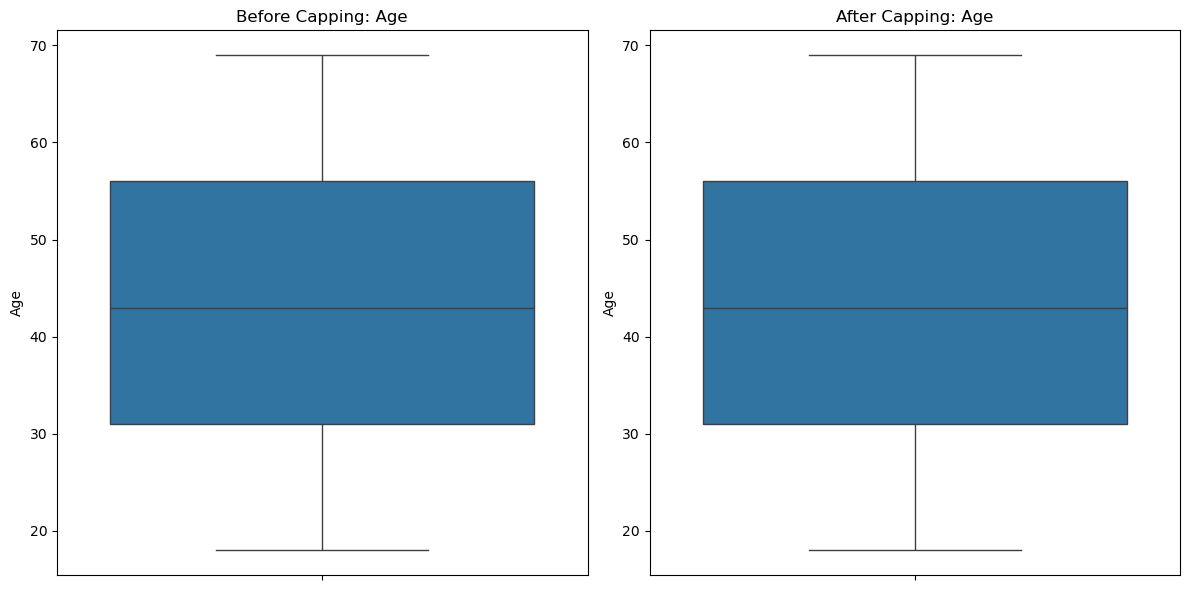

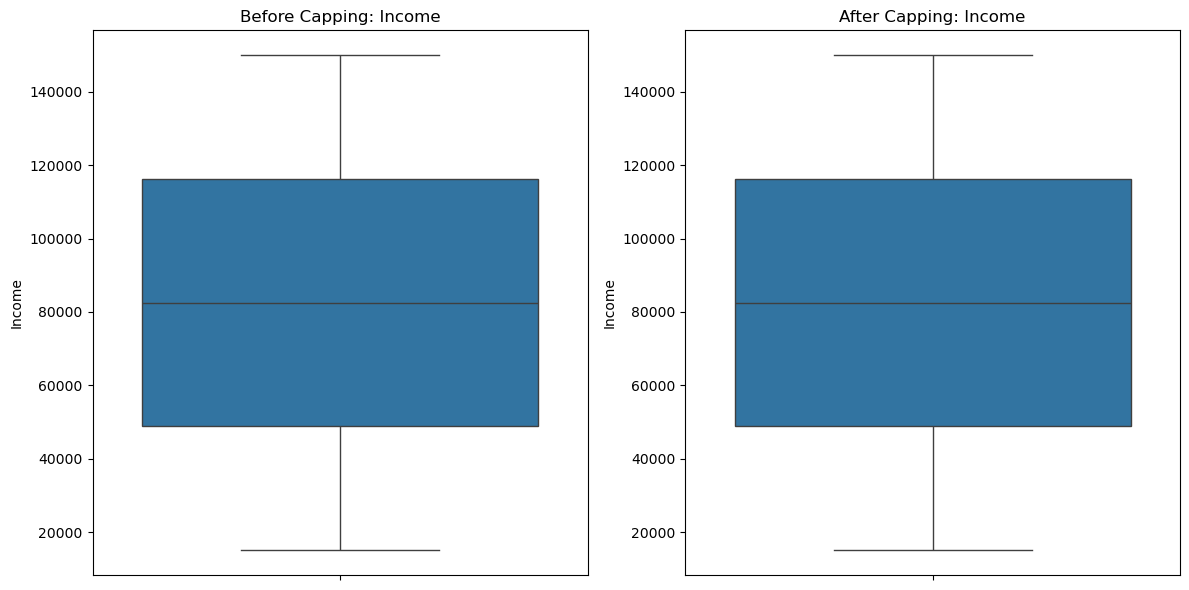

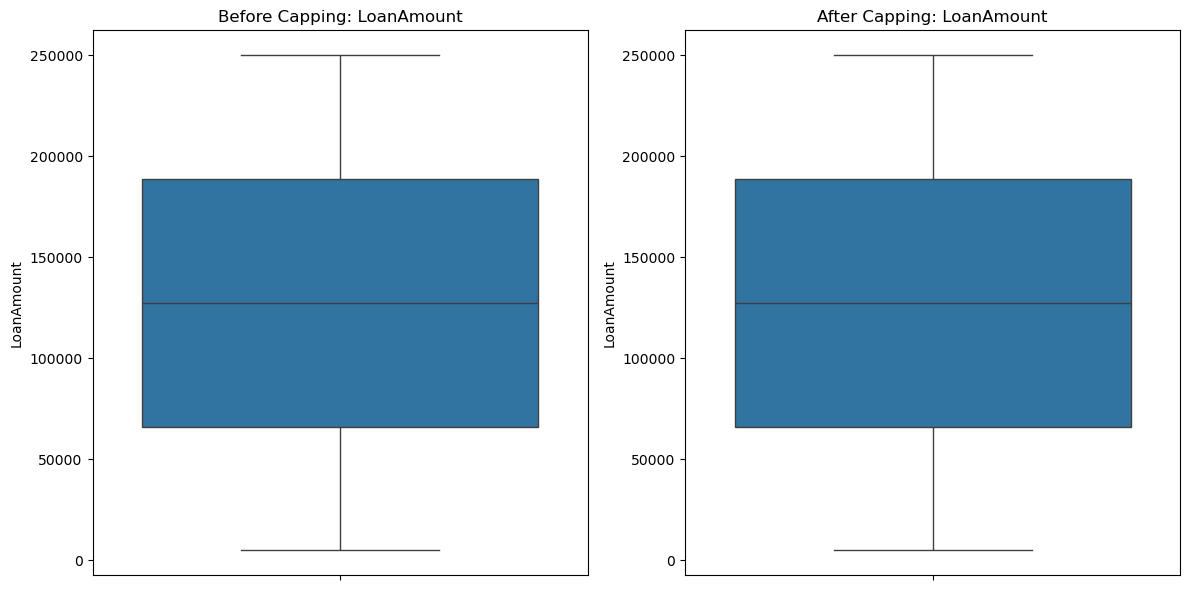

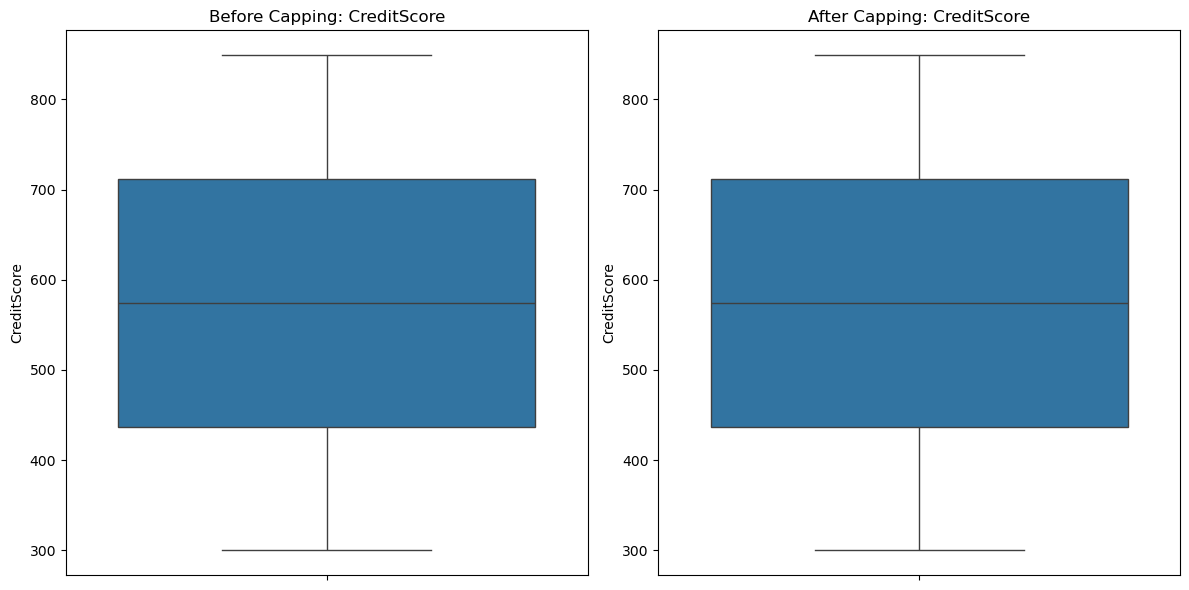

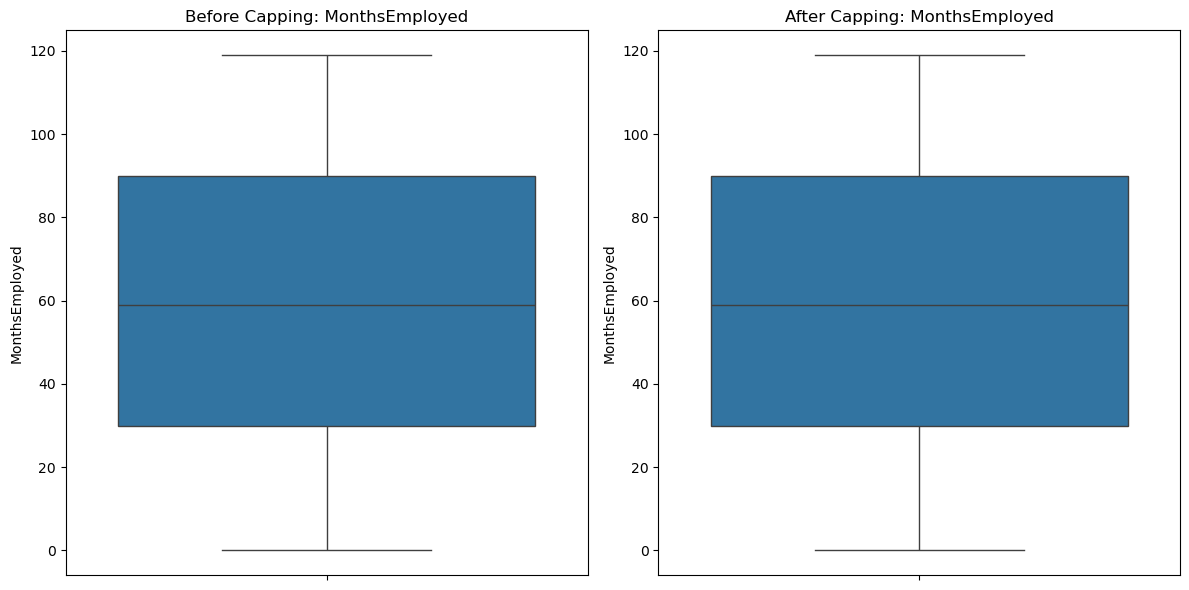

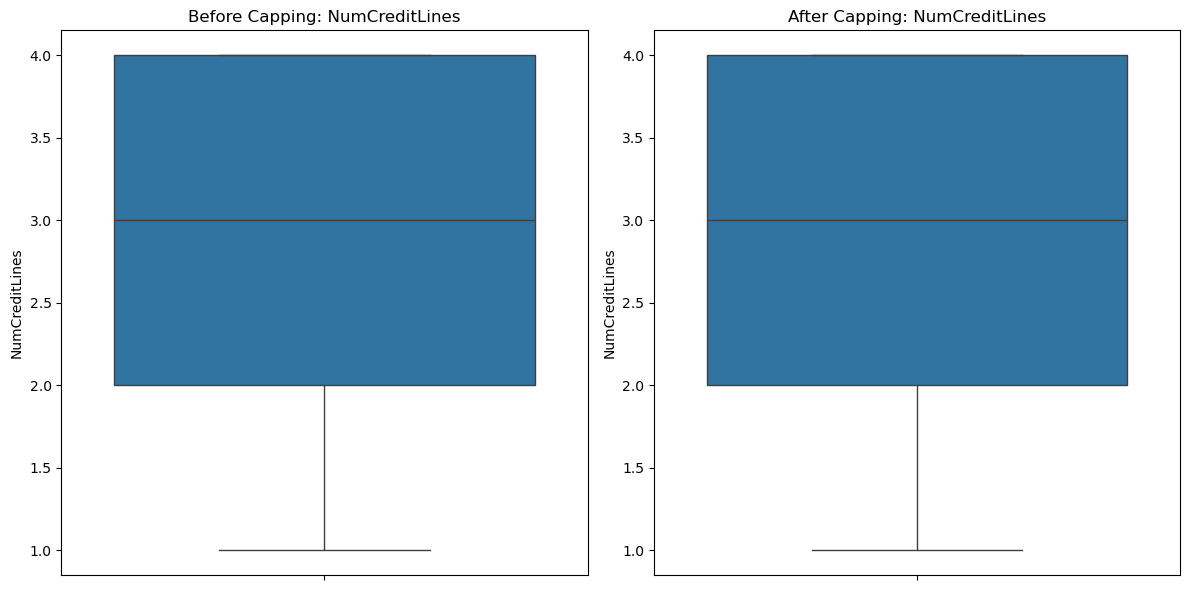

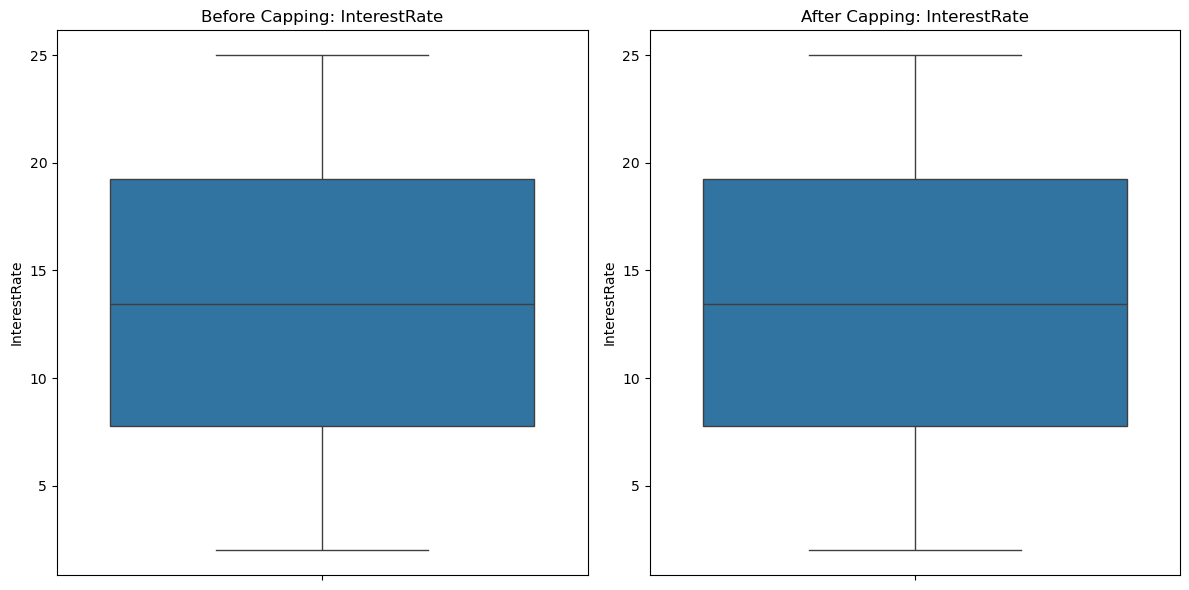

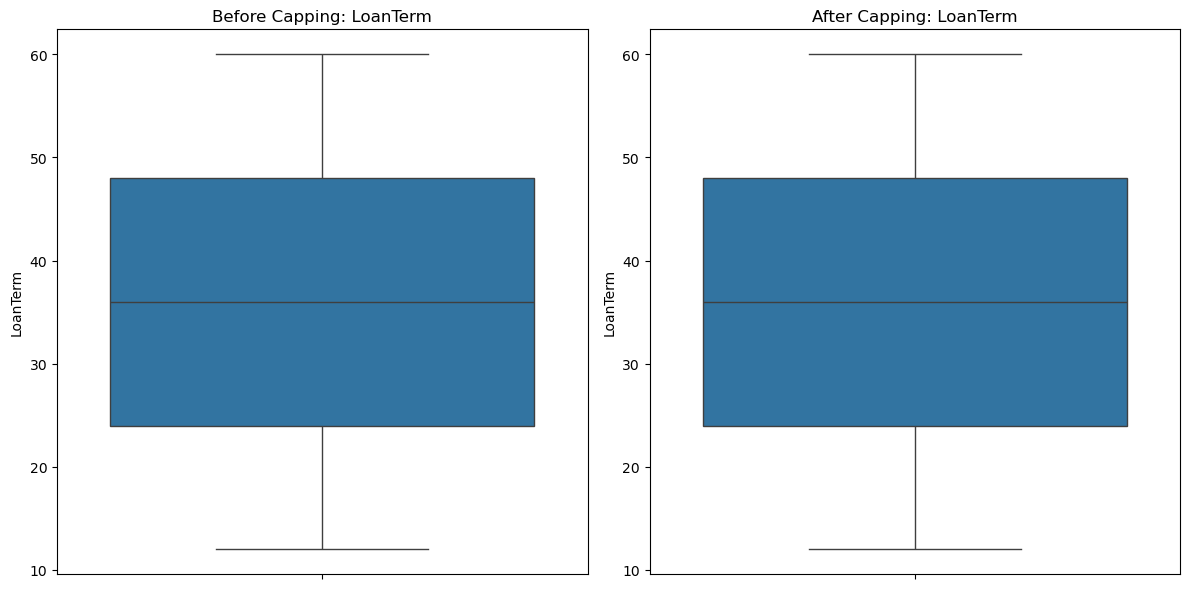

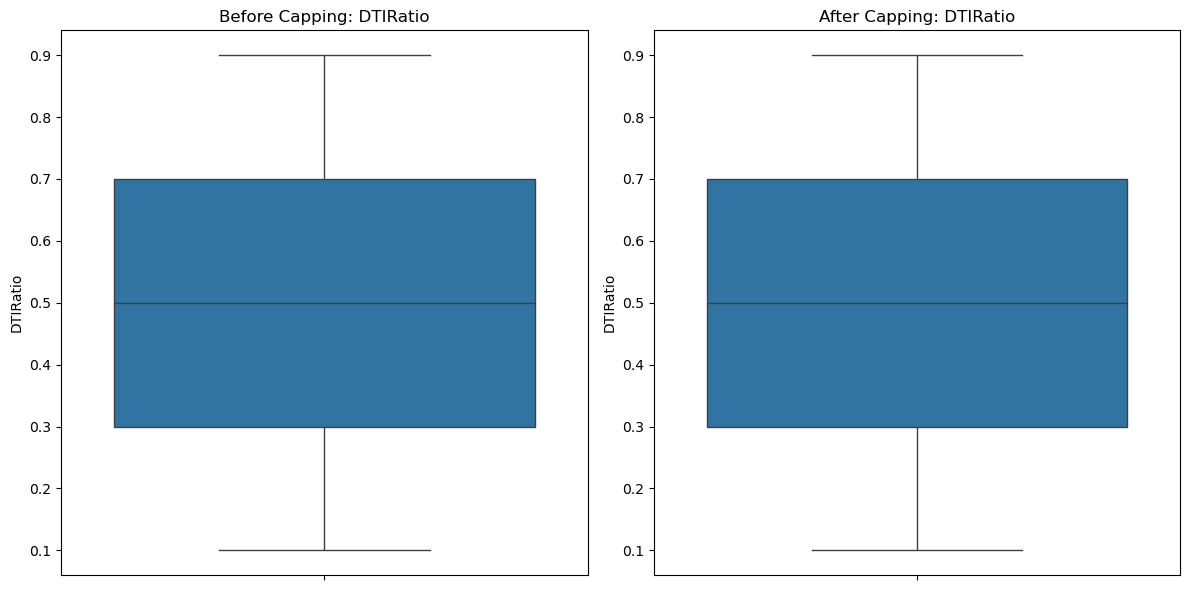

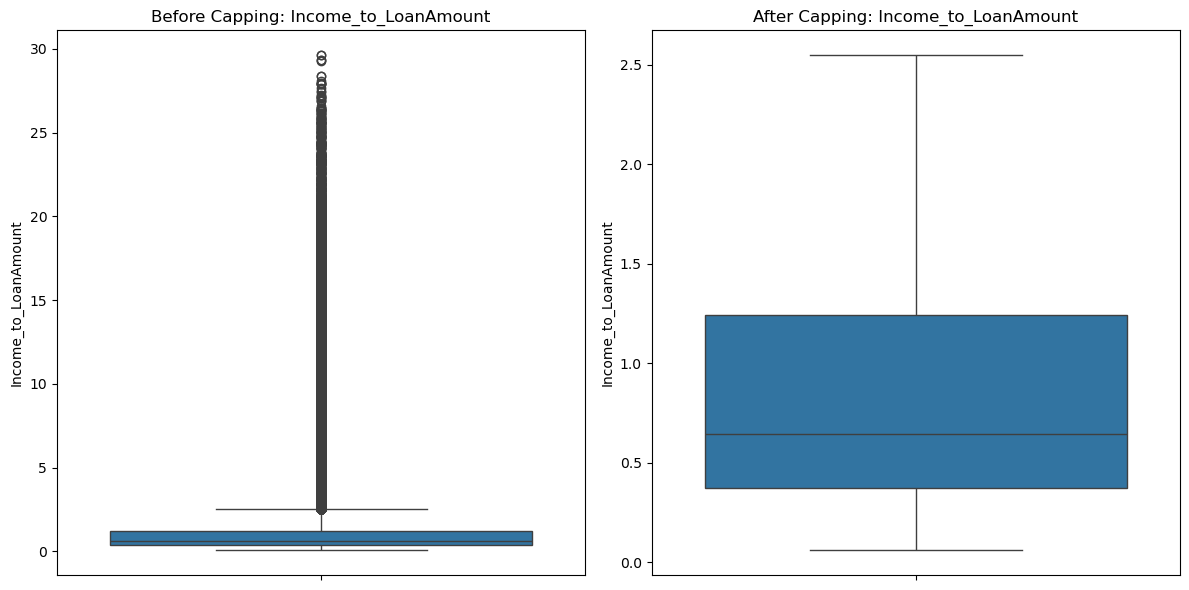

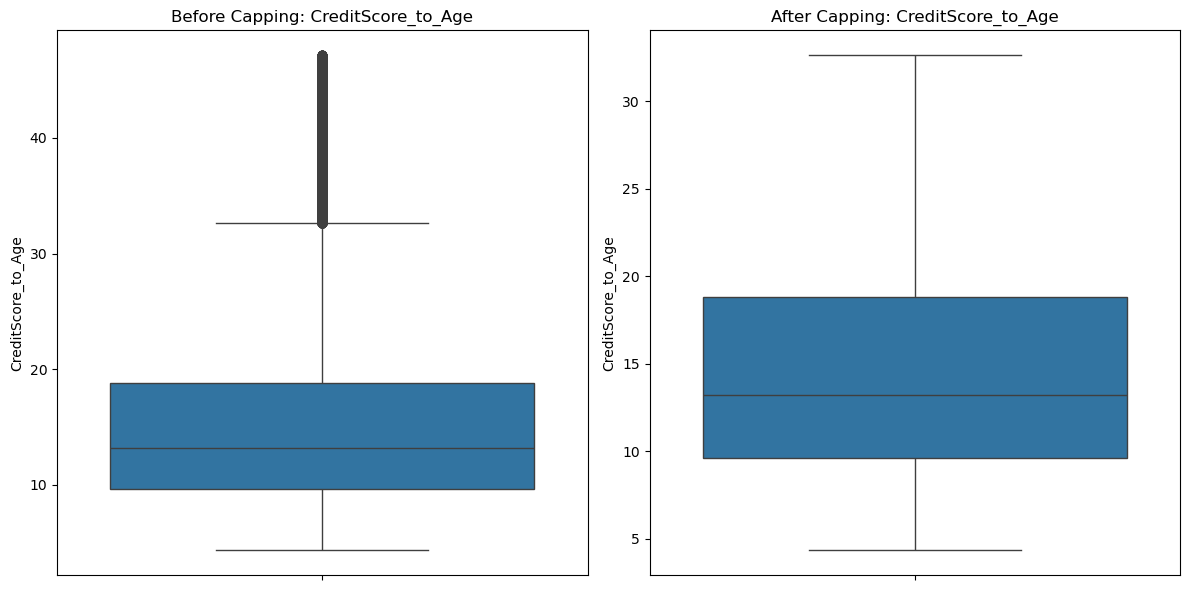

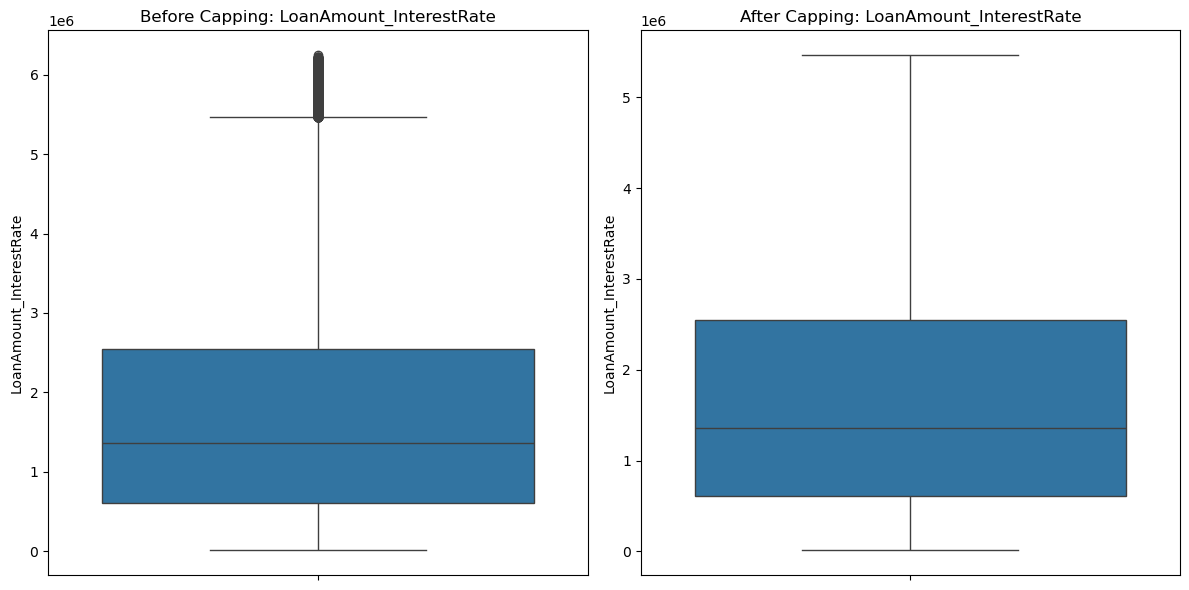

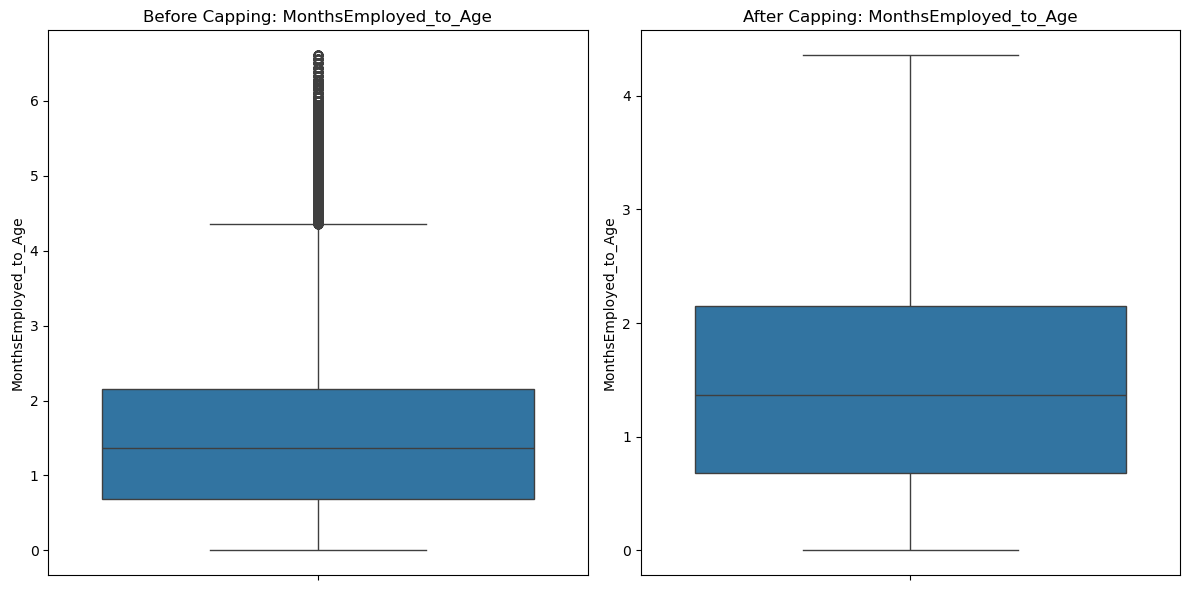

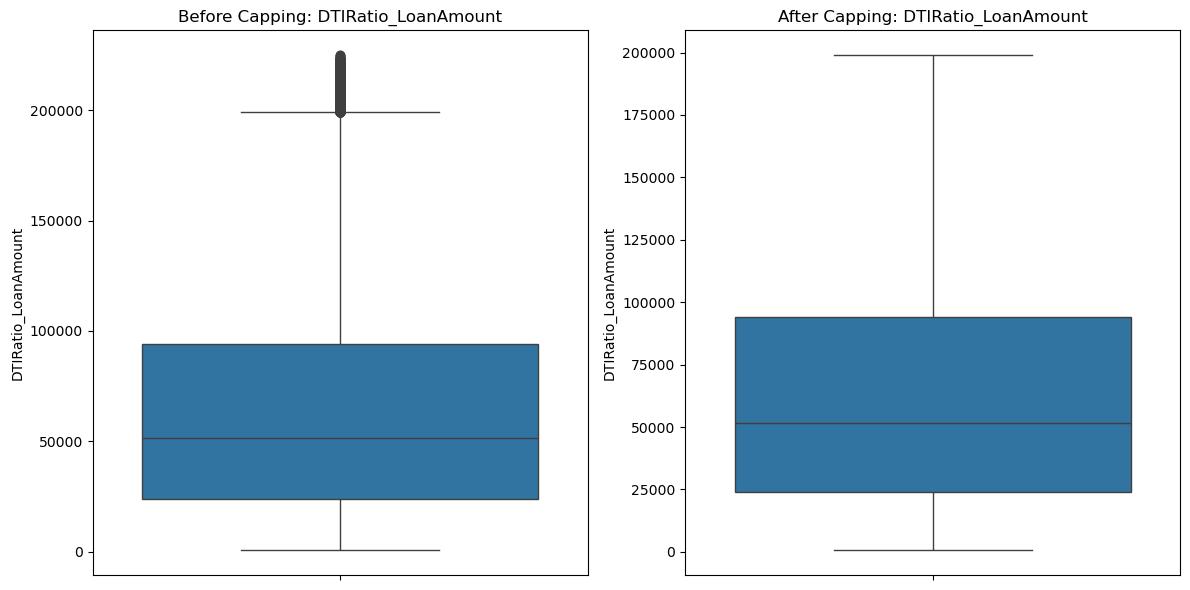

In [160]:
train_df, test_df = cap_outliers_iqr(train_df, test_df, numericCols)

In [161]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           204277 non-null  float64
 1   Income                        204277 non-null  float64
 2   LoanAmount                    204277 non-null  float64
 3   CreditScore                   204277 non-null  float64
 4   MonthsEmployed                204277 non-null  float64
 5   NumCreditLines                204277 non-null  float64
 6   InterestRate                  204277 non-null  float64
 7   LoanTerm                      204277 non-null  float64
 8   DTIRatio                      204277 non-null  float64
 9   Education                     204277 non-null  int64  
 10  HasMortgage                   204277 non-null  bool   
 11  HasDependents                 204277 non-null  bool   
 12  HasCoSigner                   204277 non-nul

In [162]:
from sklearn.preprocessing import StandardScaler

def applyStandardScaler(df : pd.DataFrame, columns_to_scale : list) -> pd.DataFrame:
    """
    This function applies the standard scaler on the given dataframe and columns.

    args : 
        df               : The dataframe on whose columns the scaler has to be applied.
        columns_to_scale : The columns on which the standard scaler has to be applied.

    return :

        A scaled dataframe
    """
    scaler = StandardScaler()
    # Scale only the specified columns
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return df

In [163]:
train_df = applyStandardScaler(train_df, numericCols)
test_df = applyStandardScaler(test_df, numericCols)

In [164]:
train_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Income_to_LoanAmount,CreditScore_to_Age,LoanAmount_InterestRate,MonthsEmployed_to_Age,DTIRatio_LoanAmount
0,-1.699838,1.413785,1.151487,1.711544,-0.967182,-0.449530,-0.454811,1.415720,1.339989,0,...,1.0,1.0,0.0,0.0,0.0,-0.360861,2.457822,0.350528,-0.098399,2.166744
1,0.234120,-0.649831,-1.715866,1.094714,-0.851727,-0.449530,0.939092,-0.000645,0.993538,0,...,0.0,0.0,1.0,0.0,0.0,2.118999,0.123991,-1.183910,-0.822142,-1.219825
2,-1.166333,0.046770,-0.458437,-0.762072,-1.515594,-0.449530,1.621727,-1.417010,-0.219039,2,...,0.0,0.0,0.0,0.0,1.0,-0.060123,0.334383,0.436194,-1.153483,-0.431445
3,0.634249,-0.839783,1.440049,-0.258537,1.370784,0.445809,0.143437,1.415720,-1.431615,1,...,1.0,0.0,0.0,0.0,0.0,-0.939356,-0.693244,1.184065,0.417307,-0.508400
4,0.367496,0.845753,-1.488613,1.673779,-1.717640,1.341148,1.656386,-1.417010,-1.691453,1,...,1.0,0.0,1.0,0.0,0.0,2.118999,0.295293,-0.870942,-1.395193,-1.259432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,-0.232698,0.875867,0.481625,0.484177,0.562598,-0.449530,1.499667,-1.417010,1.599826,1,...,0.0,0.0,0.0,1.0,0.0,-0.277523,0.174226,1.535437,0.377923,1.576920
204273,1.567884,-0.501854,0.874343,-0.718013,0.504870,0.445809,-0.632628,-0.000645,-1.691453,1,...,1.0,1.0,0.0,0.0,0.0,-0.788034,-1.138381,0.032663,-0.363416,-0.881526
204274,1.234443,-1.235732,-0.958332,-0.315185,0.995555,0.445809,-0.567830,1.415720,-1.128471,3,...,1.0,0.0,0.0,0.0,0.0,-0.467857,-0.917141,-0.841744,-0.034042,-1.015520
204275,0.034055,1.636778,1.000728,-0.535481,-1.515594,1.341148,-1.383075,0.707538,-0.868633,0,...,0.0,0.0,0.0,1.0,0.0,-0.256983,-0.545787,-0.637648,-1.252365,-0.087602


In [165]:
test_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Income_to_LoanAmount,CreditScore_to_Age,LoanAmount_InterestRate,MonthsEmployed_to_Age,DTIRatio_LoanAmount
0,0.765897,0.773827,-0.498867,0.037610,1.539639,-0.444629,1.510818,-0.005025,-1.510226,3,...,1.0,0.0,0.0,1.0,0.0,0.378004,-0.621936,0.331547,0.453944,-1.023077
1,0.832695,0.233227,0.054683,0.414948,-0.163880,-1.339494,0.252898,-1.411260,-0.297696,0,...,0.0,0.0,1.0,0.0,0.0,-0.310109,-0.499024,0.201635,-0.531116,-0.144597
2,-1.171251,-0.110305,-0.738698,-0.037858,1.308653,0.450236,0.679235,-1.411260,-0.903961,2,...,0.0,0.0,1.0,0.0,0.0,0.137632,0.954288,-0.269665,2.246430,-0.858315
3,-1.171251,-0.498341,-1.651529,-1.566077,1.684005,-1.339494,0.180586,-0.708142,-0.384306,0,...,1.0,1.0,0.0,0.0,0.0,2.124947,-0.346980,-1.153956,2.535579,-1.216986
4,-1.304848,-1.353786,-1.504912,0.547016,1.222034,0.450236,0.227288,1.401209,0.828225,3,...,1.0,1.0,0.0,0.0,0.0,0.616200,1.747723,-1.036629,2.437557,-1.007517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,0.498704,0.435859,0.602526,0.333191,-1.030075,-1.339494,0.530092,-1.411260,-0.167782,3,...,0.0,0.0,0.0,0.0,0.0,-0.457394,-0.378270,0.866637,-0.977176,0.303403
51066,-0.970857,-1.037148,-0.231557,-1.283073,-0.250499,1.345102,-0.965853,-0.005025,0.005436,3,...,0.0,0.0,0.0,0.0,1.0,-0.728854,-0.311526,-0.688704,0.186573,-0.163522
51067,1.567476,0.154727,0.211373,0.980955,-0.250499,-1.339494,1.412896,0.698092,1.261271,1,...,0.0,0.0,1.0,0.0,0.0,-0.409462,-0.573649,1.135230,-0.714611,1.009665
51068,-0.102480,0.876195,0.893344,-0.547264,-1.549793,-1.339494,-0.403932,1.401209,-0.774047,1,...,0.0,0.0,0.0,0.0,1.0,-0.421891,-0.474991,0.252650,-1.273285,-0.051586


# Applying Models

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate

In [167]:
X_train = train_df.drop(columns = 'Default')
y_train = train_df['Default']

In [168]:
X_test = test_df.copy()

In [169]:
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Income_to_LoanAmount,CreditScore_to_Age,LoanAmount_InterestRate,MonthsEmployed_to_Age,DTIRatio_LoanAmount
0,-1.699838,1.413785,1.151487,1.711544,-0.967182,-0.449530,-0.454811,1.415720,1.339989,0,...,1.0,1.0,0.0,0.0,0.0,-0.360861,2.457822,0.350528,-0.098399,2.166744
1,0.234120,-0.649831,-1.715866,1.094714,-0.851727,-0.449530,0.939092,-0.000645,0.993538,0,...,0.0,0.0,1.0,0.0,0.0,2.118999,0.123991,-1.183910,-0.822142,-1.219825
2,-1.166333,0.046770,-0.458437,-0.762072,-1.515594,-0.449530,1.621727,-1.417010,-0.219039,2,...,0.0,0.0,0.0,0.0,1.0,-0.060123,0.334383,0.436194,-1.153483,-0.431445
3,0.634249,-0.839783,1.440049,-0.258537,1.370784,0.445809,0.143437,1.415720,-1.431615,1,...,1.0,0.0,0.0,0.0,0.0,-0.939356,-0.693244,1.184065,0.417307,-0.508400
4,0.367496,0.845753,-1.488613,1.673779,-1.717640,1.341148,1.656386,-1.417010,-1.691453,1,...,1.0,0.0,1.0,0.0,0.0,2.118999,0.295293,-0.870942,-1.395193,-1.259432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,-0.232698,0.875867,0.481625,0.484177,0.562598,-0.449530,1.499667,-1.417010,1.599826,1,...,0.0,0.0,0.0,1.0,0.0,-0.277523,0.174226,1.535437,0.377923,1.576920
204273,1.567884,-0.501854,0.874343,-0.718013,0.504870,0.445809,-0.632628,-0.000645,-1.691453,1,...,1.0,1.0,0.0,0.0,0.0,-0.788034,-1.138381,0.032663,-0.363416,-0.881526
204274,1.234443,-1.235732,-0.958332,-0.315185,0.995555,0.445809,-0.567830,1.415720,-1.128471,3,...,1.0,0.0,0.0,0.0,0.0,-0.467857,-0.917141,-0.841744,-0.034042,-1.015520
204275,0.034055,1.636778,1.000728,-0.535481,-1.515594,1.341148,-1.383075,0.707538,-0.868633,0,...,0.0,0.0,0.0,1.0,0.0,-0.256983,-0.545787,-0.637648,-1.252365,-0.087602


# Applying all the models once to note their accuracy.

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier

classifiers = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_jobs=-1),
    "RandomForestClassifier": RandomForestClassifier(random_state=42,n_jobs=-1),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42,algorithm='SAMME'),
    "XGBClassifier": XGBClassifier(random_state=42,n_jobs=-1),
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_validate


# Initialize Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Initialize a DataFrame to store results
selection_df = pd.DataFrame(columns=["Model", "Accuracy"])


# Iterate over each classifier
for model_name, model in classifiers.items():
    print(f'{model_name} Started')
    scores = cross_validate(
        model, X_train, y_train,
        scoring='accuracy',
        cv=stratified_kfold,
        n_jobs=-1
    )

    # Calculate mean scores for each metric
    
    accuracy_mean = scores['test_score'].mean()
    
    # Append results to the DataFrame
    temp = {
        "Model": model_name,
        "Accuracy": accuracy_mean,
    }

    # Add accuracy scores for each class to the temp dictionary
    
    selection_df = pd.concat([selection_df, pd.DataFrame([temp])])
    print(f'{model_name} Finished')


In [ ]:
selection_df.sort_values('Accuracy',ascending=False)

In [ ]:
def submission(model,name,path):
    """
    This function saves the .csv file of the prediction.

    args:
        model : The name of the model for which the .csv file is to be saved.
        name  : The name of the file.
        path  : The path of the file.

    return:
        None
    """
    import os
    id_ser = pd.read_csv('test.csv')['LoanID']
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test[X_train.columns])
    data_dict = {'LoanID':id_ser,'Default':y_pred}
    ans = pd.DataFrame(data=data_dict)
    #unmapper = {0:'Poor',1:'Standard',2:'Good'}
    #ans['Credit_Score'] = ans['Credit_Score'].map(unmapper)
    os.makedirs(path,exist_ok=True)
    ans.to_csv(f'{path}/{name}.csv',index=False)

## Applying Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Define hyperparameters to tune for AdaBoostClassifier
param_grid = {
    'classifier__n_estimators': [200],
    'classifier__learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
}

# Initialize resampling techniques with names (None is used for the original AdaBoost without resampling)
resamplers = {
    "Normal_Ada": 0,
}

# Initialize Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Initialize a DataFrame to store results
tuning_results = pd.DataFrame(columns=["Resampling Technique", "Best Params", "Accuracy"])

# Iterate over each resampling technique and add the original AdaBoost
for resampler_name, resampler in resamplers.items():
    if resampler == 0:
        # Standard AdaBoost without resampling
        pipeline = Pipeline([
            ('classifier', AdaBoostClassifier(random_state=42,algorithm='SAMME'))
        ])
    else:
        # Pipeline with resampling and AdaBoost
        pipeline = ImbPipeline([
            (resampler_name.lower(), resampler),
            ('classifier', AdaBoostClassifier(random_state=42,algorithm='SAMME'))
        ])
    
    # Set up GridSearchCV with accuracy as scoring
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=stratified_kfold,
        n_jobs=-1
    )
    
    # Perform grid search
    print(f'{resampler_name} AdaBoost Tuning Started')
    grid_search.fit(X_train, y_train)
    
    # Get the best score and parameters
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    # Store results in the DataFrame
    temp = {
        "Resampling Technique": resampler_name,
        "Best Params": best_params,
        "Accuracy": best_score
    }
    
    tuning_results = pd.concat([tuning_results, pd.DataFrame([temp])], ignore_index=True)
    print(f'{resampler_name} AdaBoostClassifier Tuning Finished')
    
    best_model = grid_search.best_estimator_
    submission(best_model, resampler_name, 'Ada_csv')

In [ ]:
tuning_results

Normal_Ada	{'classifier__learning_rate': 0.1, 'classifier...	0.884221
Normal_Ada	{'classifier__learning_rate': 0.01, 'classifie...	0.883722
Normal_Ada	{'classifier__learning_rate': 0.2, 'classifier...	0.885063
Normal_Ada	{'classifier__learning_rate': 0.3, 'classifier...	0.885665
Normal_Ada	{'classifier__learning_rate': 0.4, 'classifier...	0.885768
Normal_Ada	{'classifier__learning_rate': 0.5, 'classifier...	0.885915
Normal_Ada	{'classifier__learning_rate': 0.6, 'classifier...	0.885934
Normal_Ada	{'classifier__learning_rate': 0.99, 'classifie...	0.886081
Normal_Ada	{'classifier__learning_rate': 10, 'classifier_...	0.883717
Normal_Ada	{'classifier__learning_rate': 5, 'classifier__...	0.883717
Normal_Ada	{'classifier__learning_rate': 2.5, 'classifier...	0.883712
Normal_Ada	{'classifier__learning_rate': 0.999, 'classifi...	0.886052
Normal_Ada	{'classifier__learning_rate': 0.99, 'classifie...	0.886125

## Applying Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Define hyperparameters to tune for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [200],
    'classifier__ccp_alpha': [1e-8,1e-6,10]   
}

# Initialize resampling techniques with names (None is used for the original RandomForest without resampling)
resamplers = {
    "Normal_RF": 0,
}

# Initialize Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=10)

# Initialize a DataFrame to store results
tuning_results = pd.DataFrame(columns=["Resampling Technique", "Best Params", "Accuracy"])

# Iterate over each resampling technique and add the original RandomForest
for resampler_name, resampler in resamplers.items():
    if resampler == 0:
        # Standard RandomForest without resampling
        pipeline = Pipeline([
            ('classifier', RandomForestClassifier(random_state=42,n_jobs=-1))
        ])
    elif resampler == 1:
        # Standard RandomForest without resampling
        pipeline = Pipeline([
            ('classifier', RandomForestClassifier(random_state=42,n_jobs=-1,class_weight='balanced'))
        ])
    else:
        # Pipeline with resampling and RandomForest
        pipeline = ImbPipeline([
            (resampler_name.lower(), resampler),
            ('classifier', RandomForestClassifier(random_state=42,n_jobs=-1))
        ])
    
    # Set up GridSearchCV with accuracy as scoring
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=stratified_kfold,
        n_jobs=-1
    )
    
    # Perform grid search
    print(f'{resampler_name} RandomForestClassifier Tuning Started')
    grid_search.fit(X_train, y_train)
    
    # Get the best score and parameters
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    # Store results in the DataFrame
    temp = {
        "Resampling Technique": resampler_name,
        "Best Params": best_params,
        "Accuracy": best_score
    }
    tuning_results = pd.concat([tuning_results, pd.DataFrame([temp])], ignore_index=True)
    print(f'{resampler_name} RandomForestClassifier Tuning Finished')
    
    best_model = grid_search.best_estimator_
    submission(best_model, resampler_name, 'RF_csv')


In [ ]:
tuning_results

In [ ]:
 # 200 1e-9,1e-10,1e-6,1e-13,1e-8 0.885406
# Normal_RF	{'classifier__ccp_alpha': 0.1, 'classifier__n_...	0.883722
# Normal_RF	{'classifier__ccp_alpha': 0.01, 'classifier__n...	0.883722
# Normal_RF	{'classifier__ccp_alpha': 0.001, 'classifier__...	0.883722
# Normal_RF	{'classifier__ccp_alpha': 0.0001, 'classifier_...	0.884441
# Normal_RF	{'classifier__ccp_alpha': 1e-05, 'classifier__...	0.88541
# Normal_RF	{'classifier__ccp_alpha': 1e-06, 'classifier__...	0.885406

## Applying XGBoost - 1

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_pipeline = Pipeline(steps=[
    ("classifier", xgb_model)
])

# Define the parameter grid for Randomized Search on XGBoost
param_dist_xgb = {
    "classifier__n_estimators": [400],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__colsample_bytree": [0.3, 0.5, 0.7, 1.0],
    "classifier__subsample": [0.5, 0.7, 1.0],
    "classifier__gamma": [0, 0.1, 0.2, 0.3],
    "classifier__min_child_weight": [1, 3, 5, 7]
}

# RandomizedSearchCV for hyperparameter tuning on XGBoost
xgb_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist_xgb, scoring='accuracy', n_iter = 60,
                               cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model with Randomized Search
xgb_search.fit(X_train, y_train)

y_pred_xgb = xgb_search.best_estimator_.predict(X_test)

loanIds = pd.read_csv("lend-or-lose/test.csv")['LoanID']

submission = pd.DataFrame({"LoanID": loanIds, "Default": y_pred_xgb})
submission.set_index("LoanID", inplace=True)

submission.to_csv("XGBoost.csv")

In [ ]:
xgb_search.best_estimator_

## Applying XGBoost - 2

In [ ]:
# Applying XGBoost another way

from sklearn.compose import ColumnTransformer
train_df_copy = pd.read_csv("lend-or-lose/train.csv")
train_df_copy = train_df_copy.drop(columns=["LoanID"],axis=1)
X_train = train_df_copy.drop(columns=["Default"])
y_train = train_df_copy["Default"]

# X_train["Income_to_LoanAmount"] = X_train["Income"] / X_train["LoanAmount"]
# X_train["CreditScore_to_Age"] = X_train["CreditScore"] / X_train["Age"]
# X_train["LoanAmount_InterestRate"] = X_train["LoanAmount"] * X_train["InterestRate"]
# X_train["MonthsEmployed_to_Age"] = X_train["MonthsEmployed"] / X_train["Age"]
# X_train["DTIRatio_LoanAmount"] = X_train["DTIRatio"] * X_train["LoanAmount"]

X_train = applyFeatureEngineering(X_train)

categorical_features = ["Education", "EmploymentType", "MaritalStatus", "HasMortgage", 
                        "HasDependents", "LoanPurpose", "HasCoSigner"]

numeric_features = [
    "Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", 
    "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio",
    "Income_to_LoanAmount", "CreditScore_to_Age", "LoanAmount_InterestRate", 
    "MonthsEmployed_to_Age", "DTIRatio_LoanAmount"
]


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder='passthrough'
)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", xgb_model)
])

param_dist_xgb = {
    "classifier__n_estimators": [400],
    "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__colsample_bytree": [0.3, 0.5, 0.7, 1.0],
    "classifier__subsample": [0.5, 0.7, 1.0],
    "classifier__gamma": [0, 0.1, 0.2, 0.3],
    "classifier__min_child_weight": [1, 3, 5, 7]
}

xgb_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist_xgb, scoring='accuracy', 
                               cv=3, verbose=1, random_state=42, n_jobs=-1,n_iter=100)

xgb_search.fit(X_train, y_train)

In [ ]:
best_model = xgb_search.best_estimator_
test_df_copy = pd.read_csv("lend-or-lose/test.csv")
loanIDs = test_df_copy['LoanID']

test_df_copy = applyFeatureEngineering(test_df_copy)

X_test = test_df_copy.drop(columns=["LoanID"])
y_test = best_model.predict(X_test)

submission = pd.DataFrame({"LoanID": loanIDs, "Default": y_test})
submission.set_index("LoanID", inplace=True)
submission.to_csv("XGBoost2.csv")

# Applying LightGBM

In [ ]:
from lightgbm import LGBMClassifier

file_path = 'lend-or-lose/train.csv'
data = pd.read_csv(file_path)
data_cleaned = data.drop(columns=["LoanID"])

X = data_cleaned.drop(columns=["Default"])
y = data_cleaned["Default"]


categorical_features = ["Education", "EmploymentType", "MaritalStatus", "HasMortgage", 
                        "HasDependents", "LoanPurpose", "HasCoSigner"]


numeric_features = [
    "Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", 
    "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio",
    "Income_to_LoanAmount", "CreditScore_to_Age", "LoanAmount_InterestRate", 
    "MonthsEmployed_to_Age", "DTIRatio_LoanAmount"
]


X["Income_to_LoanAmount"] = X["Income"] / X["LoanAmount"]
X["CreditScore_to_Age"] = X["CreditScore"] / X["Age"]
X["LoanAmount_InterestRate"] = X["LoanAmount"] * X["InterestRate"]
X["MonthsEmployed_to_Age"] = X["MonthsEmployed"] / X["Age"]
X["DTIRatio_LoanAmount"] = X["DTIRatio"] * X["LoanAmount"]


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder='passthrough'
)


lgb_model = LGBMClassifier(random_state=42)

lgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", lgb_model)
])

param_dist_lgb = {
     "classifier__n_estimators": [400],
     "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
     "classifier__max_depth": [3, 5, 7, 10],
     "classifier__colsample_bytree": [0.3, 0.5, 0.7, 1.0],
     "classifier__subsample": [0.5, 0.7, 1.0],
     "classifier__gamma": [0, 0.1, 0.2, 0.3],
     "classifier__min_child_weight": [1, 3, 5, 7]
}
    

# RandomizedSearchCV for hyperparameter tuning on LGB
lgb_search = RandomizedSearchCV(lgb_pipeline, param_distributions=param_dist_lgb, scoring='accuracy', 
                               cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model with Randomized Search
lgb_search.fit(X, y)

# Evaluate best LGB model
y_pred_lgb = lgb_search.best_estimator_.predict(X_test)

In [ ]:
best_model = lgb_search.best_estimator_

test_file_path = 'lend-or-lose/test.csv'
test_data = pd.read_csv(test_file_path)

loan_ids = test_data["LoanID"]

# Apply the same feature engineering on test data
test_data["Income_to_LoanAmount"] = test_data["Income"] / test_data["LoanAmount"]
test_data["CreditScore_to_Age"] = test_data["CreditScore"] / test_data["Age"]
test_data["LoanAmount_InterestRate"] = test_data["LoanAmount"] * test_data["InterestRate"]
test_data["MonthsEmployed_to_Age"] = test_data["MonthsEmployed"] / test_data["Age"]
test_data["DTIRatio_LoanAmount"] = test_data["DTIRatio"] * test_data["LoanAmount"]

# Drop LoanID for prediction
X_test_data = test_data.drop(columns=["LoanID"])

# Predict using the best model
y_test_pred = best_model.predict(X_test_data)

# Prepare submission DataFrame
submission = pd.DataFrame({"LoanID": loan_ids, "Default": y_test_pred})
submission.set_index("LoanID", inplace=True)

# Save predictions to CSV
submission.to_csv("LightGBM.csv")

# Checkpoint 2

In [170]:
def submission(model,name,path):
    """
    This function saves the .csv file of the prediction.

    args:
        model : The name of the model for which the .csv file is to be saved.
        name  : The name of the file.
        path  : The path of the file.

    return:
        None
    """
    import os
    id_ser = pd.read_csv('test.csv')['LoanID']
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test[X_train.columns])
    data_dict = {'LoanID':id_ser,'Default':y_pred}
    ans = pd.DataFrame(data=data_dict)
    #unmapper = {0:'Poor',1:'Standard',2:'Good'}
    #ans['Credit_Score'] = ans['Credit_Score'].map(unmapper)
    os.makedirs(path,exist_ok=True)
    ans.to_csv(f'{path}/{name}.csv',index=False)

## Neural Network

In [171]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(
    n_splits=5,  # Number of folds for cross-validation
    shuffle=True,  # Shuffle data before splitting to ensure randomness
    random_state=42  # Set random state for reproducibility
)

# Define hyperparameters for MLP
param_dist_mlp = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Number of neurons in each layer
    'classifier__activation': ['relu', 'tanh', 'logistic'],  # Activation functions to explore
    'classifier__solver': ['adam', 'sgd'],  # Optimization algorithms
    'classifier__alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'classifier__learning_rate': ['constant', 'adaptive']  # Learning rate schedules
}

# Define the pipeline
pipeline_mlp = Pipeline([
    ('classifier', MLPClassifier(random_state=42, max_iter=1000))  
    # MLPClassifier with random state for reproducibility and max_iter for sufficient iterations
])

# Set up RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(
    estimator=pipeline_mlp,  # Pipeline with MLPClassifier
    param_distributions=param_dist_mlp,  # Hyperparameter distribution to explore
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=stratified_kfold,  # Perform stratified cross-validation
    n_iter=50,  # Number of random hyperparameter combinations to evaluate
    random_state=42,  # Set random state for reproducibility
    n_jobs=-1  # Utilize all available CPU cores for parallel processing
)

print('MLP Started')  # Informative print statement to indicate the start of the MLP process

# Perform randomized search
print('MLP RandomizedSearch Started')  # Informative print statement to indicate the start of hyperparameter tuning
random_search_mlp.fit(X_train, y_train)  # Train the model using randomized search with cross-validation
print('MLP RandomizedSearch Finished')  # Informative print statement to indicate the completion of the search

MLP Started
MLP RandomizedSearch Started
MLP RandomizedSearch Finished


In [172]:
# Save the best model predictions
best_model_mlp = random_search_mlp.best_estimator_
submission(best_model_mlp, 'MLP', 'MLP_csv')

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define hyperparameters for SVM
param_dist_svm = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Types of kernel functions
    'classifier__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly'
    'classifier__degree': [2, 3, 4]  # Degree of the polynomial kernel (only relevant for 'poly')
}

# Initialize Stratified K-Fold cross-validator
# Ensures the same proportion of class labels in each fold
stratified_kfold = StratifiedKFold(n_splits=10)

# Define the pipeline
# The pipeline consists of only the classifier in this case
pipeline_svm = Pipeline([
    ('classifier', SVC(random_state=42))  # Support Vector Classifier
])

# Set up RandomizedSearchCV
random_search_svm = RandomizedSearchCV(
    estimator=pipeline_svm,  # Pipeline as the base estimator
    param_distributions=param_dist_svm,  # Hyperparameter distributions
    scoring='accuracy',  # Metric used for evaluation
    cv=stratified_kfold,  # Cross-validation strategy
    n_iter=35,  # Number of random hyperparameter combinations to try
    random_state=42,  # Ensures reproducibility of results
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Perform randomized search
print('SVM RandomizedSearch Started')  # Informative print statement
random_search_svm.fit(X_train, y_train)  # Fit the model on the training data
print('SVM RandomizedSearch Finished')  # Informative print statement

# Save the best model predictions
best_model_svm = random_search_svm.best_estimator_  # Retrieve the best estimator
submission(best_model_svm, 'SVM', 'SVM_csv')  # Save predictions to a CSV file


## Logistic Regression

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define hyperparameters for Logistic Regression
param_dist_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (smaller values specify stronger regularization)
    'classifier__penalty': ['l1', 'l2', 'elasticnet',None],  # Regularization type
    'classifier__solver': ['lbfgs', 'saga', 'liblinear'],  # Optimization algorithms for solving the model
    'classifier__max_iter': [100, 200, 500]  # Maximum number of iterations for convergence
}

# Define the pipeline
# Logistic Regression is added to the pipeline
pipeline_lr = Pipeline([
    ('classifier', LogisticRegression(random_state=42))  # Logistic Regression with random state for reproducibility
])

# Set up RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=pipeline_lr,  # Use the pipeline as the base estimator
    param_distributions=param_dist_lr,  # Hyperparameter distribution to explore
    scoring='accuracy',  # Evaluation metric for model selection
    cv=stratified_kfold,  # Cross-validation strategy using StratifiedKFold
    n_iter=50,  # Number of random combinations of hyperparameters to evaluate
    random_state=42,  # Random state for reproducibility
    n_jobs=-1  # Parallelize across all available CPU cores
)

# Perform randomized search
print('Logistic Regression RandomizedSearch Started')  # Informative print statement
random_search_lr.fit(X_train, y_train)  # Train the model using randomized search
print('Logistic Regression RandomizedSearch Finished')  # Informative print statement

# Save the best model predictions
best_model_lr = random_search_lr.best_estimator_  # Retrieve the best estimator (pipeline with optimal hyperparameters)
submission(best_model_lr, 'Logistic_Regression', 'LR_csv')  # Save predictions for submission


Logistic Regression RandomizedSearch Started


/Users/pranav_kulkarni/micromamba/envs/main/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pranav_kulkarni/micromamba/envs/main/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pranav_kulkarni/micromamba/envs/main/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pranav_kulkarni/micromamba/envs/main/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pranav_kulkarni/micromamba/envs/main/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_rati

Logistic Regression RandomizedSearch Finished
